In [ ]:
!unzip -u "/content/drive/MyDrive/Skin_Cancer/blur.zip" -d "/content"

print('\n\n\n!!!!!fInIsheD unZipPinG!!!!!!')

Streaming output truncated to the last 5000 lines.
  inflating: /content/blur/train/MC/img697.jpg  
  inflating: /content/blur/train/MC/img684.jpg  
  inflating: /content/blur/train/BC/img3444.jpg  
  inflating: /content/blur/train/MC/img685.jpg  
  inflating: /content/blur/train/BC/img3451.jpg  
  inflating: /content/blur/train/MC/img695.jpg  
  inflating: /content/blur/train/MC/img683.jpg  
  inflating: /content/blur/train/MC/img690.jpg  
  inflating: /content/blur/train/MC/img691.jpg  
  inflating: /content/blur/train/BC/img3441.jpg  
  inflating: /content/blur/train/MC/img682.jpg  
  inflating: /content/blur/train/BC/img3436.jpg  
  inflating: /content/blur/train/MC/img688.jpg  
  inflating: /content/blur/train/BC/img3438.jpg  
  inflating: /content/blur/train/MC/img679.jpg  
  inflating: /content/blur/train/BC/img3439.jpg  
  inflating: /content/blur/train/MC/img680.jpg  
  inflating: /content/blur/train/MC/img678.jpg  
  inflating: /content/blur/train/BC/img3433.jpg  
  inflating

In [ ]:
pip install split-folders


In [ ]:
import splitfolders

input_folder="/content/fire"


output="/content/splitfire"



splitfolders.ratio(input_folder, output, seed=42, ratio=(.8, .2))

#42
#1337
#9021

print("i am done")

Copying files: 12621 files [00:04, 2601.87 files/s]

i am done


In [ ]:
!nvidia-smi

Wed Aug 18 09:55:41 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow import keras
import numpy as np
from glob import glob

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
import random as python_random
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3
#from tensorflow.keras.applications.inceptionv3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow import keras
import numpy as np
from glob import glob
#import keras.backend as K
#from keras.models import Sequential
#from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
import random as python_random
import tensorflow as tf

#python_random.seed(123)
#tf.random.set_seed(1234)

IMAGE_SIZE = [224,224]
CLASS=12

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#model = VGG16(weights='imagenet', include_top=False)

for layer in inception.layers:
    layer.trainable = False
  
#folders = glob('C:\rafid\guava disease research\k_guava\train_image/*')
 
x = Flatten()(inception.output)

prediction =Dense(12, activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)
adam = keras.optimizers.Adam(lr=0.001)
model.compile(
  loss='categorical_crossentropy',
  optimizer=adam,
  metrics=['accuracy']
)



print("\n\n")
model.summary()

87924736/87910968 [==============================] - 1s 0us/step



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
__________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#######3orginal
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import callbacks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2,activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 24, 24, 64)        1

In [ ]:
op = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=op,loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   #brightness_range=(0.4, 0.7),
                                   #width_shift_range=0.2,
                                   #height_shift_range=0.2,
                                   vertical_flip= True,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/blur/train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 seed=1,
                                                 #save_to_dir="C:/rafid/keras1",
                                                 #save_prefix="kaug", 
                                                 #save_format="png"
                                                )

val_set = val_datagen.flow_from_directory('/content/blur/test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory('/content/blur/val',
                                            target_size = (224,224),
                                            batch_size = 1,
                                            class_mode = 'categorical')



model.optimizer.get_config()

Found 9712 images belonging to 2 classes.
Found 1388 images belonging to 2 classes.
Found 2775 images belonging to 2 classes.


{'amsgrad': False,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'decay': 0.0,
 'epsilon': 1e-07,
 'learning_rate': 0.001,
 'name': 'Adam'}

In [ ]:
from PIL import Image

filepath = "/content/drive/MyDrive/Skin_Cancer/Weights/badfire_inV3__Adam0.001_val.h5"
filepath2 = "/content/drive/MyDrive/Skin_Cancer/Weights/badfire_inV3__Adam0.001_val.h5"


checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,save_weights_only=True,
                             save_best_only=True, mode='max')

checkpoint2 = ModelCheckpoint(filepath2, monitor='accuracy', verbose=1,save_weights_only=True,
                             save_best_only=True, mode='max')


#reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2,
 #                             verbose=1, mode='max', min_lr=0.00001)

log_csv = CSVLogger('/content/drive/MyDrive/Skin_Cancer/Logs/badfire_inV3__Adam0.001_val.h5', separator=',', append=False)
    
    
callbacks_list = [checkpoint1,checkpoint2,log_csv]


r = model.fit_generator(
    training_set,
    epochs=300,
    validation_data=val_set,
    steps_per_epoch = len(training_set),
    validation_steps=len(val_set),
    callbacks=callbacks_list,
    shuffle=False
    

)

#model.save_weights("/content/drive/MyDrive/Modle_Weights/RMSprop0008VU_end.h")


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/300
316/316 [==============================] - 216s 575ms/step - loss: 9.7274 - accuracy: 0.1247 - val_loss: 12.6268 - val_accuracy: 0.1013

Epoch 00001: val_accuracy improved from -inf to 0.10135, saving model to /content/drive/MyDrive/Skin_Cancer/Weights/badfire_inV3__Adam0.001_val.h5

Epoch 00001: accuracy improved from -inf to 0.12472, saving model to /content/drive/MyDrive/Skin_Cancer/Weights/badfire_inV3__Adam0.001_val.h5
Epoch 2/300
316/316 [==============================] - 181s 571ms/step - loss: 8.9770 - accuracy: 0.1530 - val_loss: 8.1597 - val_accuracy: 0.1833

Epoch 00002: val_accuracy improved from 0.10135 to 0.18329, saving model to /content/drive/MyDrive/Skin_Cancer/Weights/badfire_inV3__Adam0.001_val.h5

Epoch 00002: accuracy improved from 0.12472 to 0.15305, saving model to /content/drive/MyDrive/Skin_Cancer/Weights/badfire_inV3__Adam0.001_val.h5
Epoch 3/300
316/316 [==============================] - 180s 571ms/step - loss: 9.2910 - accuracy: 0.1648 - val_loss

KeyboardInterrupt: ignored

In [ ]:
from PIL import Image

filepath = "/content/drive/MyDrive/Skin_Cancer/Weights/TskinCNN_TESTdense1_Adam0.001_val.h5"
filepath2 = "/content/drive/MyDrive/Skin_Cancer/Weights/TskinCNN_TESTdense1_Adam0.001_train.h5"


checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,save_weights_only=True,
                             save_best_only=True, mode='max')

checkpoint2 = ModelCheckpoint(filepath2, monitor='accuracy', verbose=1,save_weights_only=True,
                             save_best_only=True, mode='max')


#reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2,
 #                             verbose=1, mode='max', min_lr=0.00001)

log_csv = CSVLogger('/content/drive/MyDrive/Skin_Cancer/Logs/TskinCNN_TESTdense1_Adam0.001.csv', separator=',', append=False)
    
    
callbacks_list = [checkpoint1,checkpoint2,log_csv]


r = model.fit_generator(
    training_set,
    epochs=350,
    validation_data=val_set,
    steps_per_epoch = len(training_set),
    validation_steps=len(val_set),
    callbacks=callbacks_list,
    shuffle=False
    

)

#model.save_weights("/content/drive/MyDrive/Modle_Weights/RMSprop0008VU_end.h")

stop = time.time()
print("\n\n")
print(f"Training time: {stop - start}s")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/350
 34/304 [==>...........................] - ETA: 1:27 - loss: 0.6665 - accuracy: 0.6268

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd

f1 = pd.read_csv('/content/TskinCNN_1_Nadam0.001.csv')


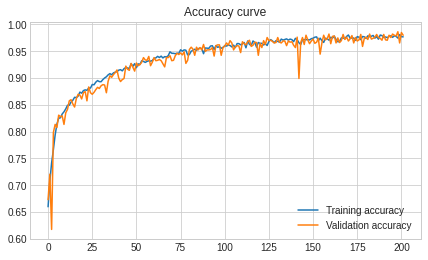

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


plt.figure(figsize=(7,4)) 
#plt.plot(fin3['accuracy'], label='Training accuracy')
#plt.plot(fin3['val_accuracy'], label='Validation accuracy')
plt.plot(f1['accuracy'], label='Training accuracy')
plt.plot(f1['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy curve')

#plt.savefig(r'C:\rafid\breast_cancer_2\aug_example\New folder\Zrms.png', dpi = 300)

plt.legend(loc='lower right')
plt.show()



In [ ]:


model.load_weights('/content/drive/MyDrive/Skin_Cancer/superpc/weights/TcancerCNN_old blur_adam0.001_val.h5')
y_pred = (model.predict(val_set))
#y_preD=np.where(y_pred > 0.5, 1,0)


In [ ]:
pred = model.predict_generator(val_set)
predicted_class_indices = np.argmax(pred, axis = 1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
print(predicted_class_indices)

[0 0 1 ... 0 0 0]


In [ ]:
#We use Support Vector classifier as a classifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
### matrics
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
probaa=[]
import os
import matplotlib.pyplot as plt
model.load_weights('/content/drive/MyDrive/Skin_Cancer/superpc/weights/TcancerCNN_old blur_adam0.001_val.h5')

dir_path1='/content/blur/test/BC'
dir_path2='/content/blur/test/MC'



for filename in os.listdir(dir_path1):
    img=image.load_img(dir_path1+'//'+filename, target_size=(224,224,3))
    im = []
    img = image.img_to_array(img)
    img = img/255
    im.append(img)
    X= np.array(im)
    result=model.predict(X,verbose=0)
    #training_set.class_indices
    res=np.argmax(result)
    probaa.append(res)

    

for filename in os.listdir(dir_path2):
    img=image.load_img(dir_path2+'//'+filename, target_size=(224,224,3))
    im = []
    img = image.img_to_array(img)
    img = img/255
    im.append(img)
    X= np.array(im)
    result=model.predict(X,verbose=0)
    #training_set.class_indices
    res=np.argmax(result)
    probaa.append(res)

 

In [ ]:
y_val=[]
for x in range (900):
  y_val.append(0)

for x in range (488):
  y_val.append(1)

#for x in range (999):
#  y_val.append(2)

print(len(y_val))



1388


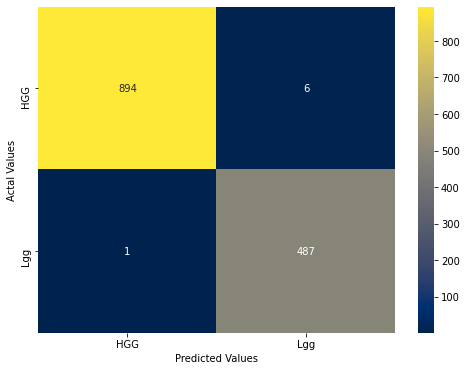

In [ ]:
y_preD=probaa
cm = confusion_matrix(y_val, y_preD)
cm_df = pd.DataFrame(cm,
                     index = ['HGG','Lgg'], 
                     columns = ['HGG','Lgg'])

#Plotting the confusion matrix


#plt.savefig('/content/drive/MyDrive/3D brain/fig/Fin_Adamax0.0001.png')

#import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(cm_df,cmap='cividis', annot=True, fmt='d')
#plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
#plt.savefig("/content/drive/MyDrive/3D brain/fig/Fin_Adamax0.0001.png", dpi = 300)
plt.show()


In [ ]:
y_preD=probaa

confusion_matrix=cm

FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = len(y_val) - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from numpy import mean

MAE=mean_absolute_error(y_val, y_preD)
MSE=mean_squared_error(y_val, y_preD)
F1=2*((mean(PPV)*mean(TPR))/(mean(PPV)+mean(TPR)))

print("ACC=   ",mean(ACC)*100)

print("Rec=   ",mean(TPR)*100)
print("Spe=   ",mean(TNR)*100)
print("Pre=   ",mean(PPV)*100)
print("FPR=   ",mean(FPR)*100)
print("FNR=   ",mean(FNR)*100)
print("NPV=   ",mean(NPV)*100)
print("FDR=   ",mean(FDR)*100)
print("F1=    ",mean(F1)*100)


print("MAE   =",MAE*100)
print("RMSE  =",math.sqrt(MSE)*100)




ACC=    99.49567723342939
Rec=    99.56420765027323
Spe=    99.56420765027323
Pre=    99.33561480843541
FPR=    0.43579234972677594
FNR=    0.43579234972677594
NPV=    99.33561480843541
FDR=    0.6643851915645858
F1=     99.44977987004316
MAE   = 0.5043227665706052
RMSE  = 7.101568605389976


In [ ]:
### error matrices
 
model.compile(
  loss='categorical_crossentropy',
  optimizer='Adam',
  metrics=['accuracy','mse', 'mae', 'mape']
)


In [ ]:
#model.load_weights('/content/drive/MyDrive/dataset for image/Lung Cancer dataset/Weights/Train1_Nadam0.001_test.h5')
from math import sqrt
preds = model.evaluate_generator(val_set)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
print ("mean square error = " + str(preds[2]*100))
print ("mean absolute error = " + str(preds[3]*100))
#print ("mean absolute percentage error = " + str(preds[4]))
print ("root mean square error = " + str(sqrt(preds[2])*100))



/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Loss = 0.020826106891036034
Test Accuracy = 0.9949567914009094
mean square error = 0.4656102042645216
mean absolute error = 0.7553485222160816
mean absolute percentage error = 3776743.75
root mean square error = 6.823563616355618


1 max_pooling2d_17 (None, 111, 111, 16)
3 max_pooling2d_18 (None, 54, 54, 32)
5 max_pooling2d_19 (None, 26, 26, 32)
7 max_pooling2d_20 (None, 12, 12, 64)
8 flatten_6 (None, 9216)
9 dense_12 (None, 1024)
10 dropout_15 (None, 1024)
11 dense_13 (None, 2)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17_input (InputLayer) [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 111, 111, 16)      0         
Total params: 448
Trainable params: 448
Non-trainable params: 0
_________________________________________________________________


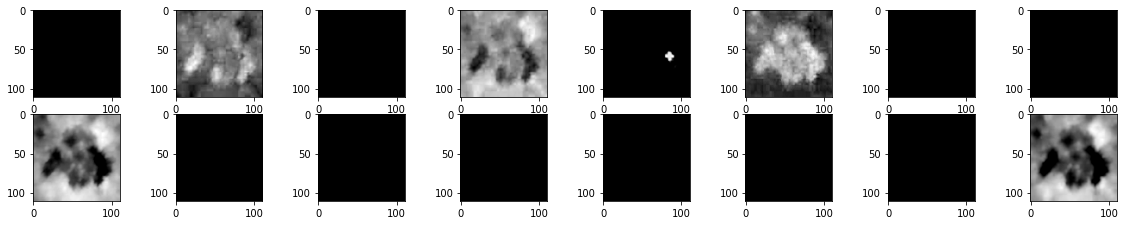

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17_input (InputLayer) [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 54, 54, 32)        0         
Total params: 5,088
Trainable params: 5,088
Non-trainable params: 0
_________________________________________________________________


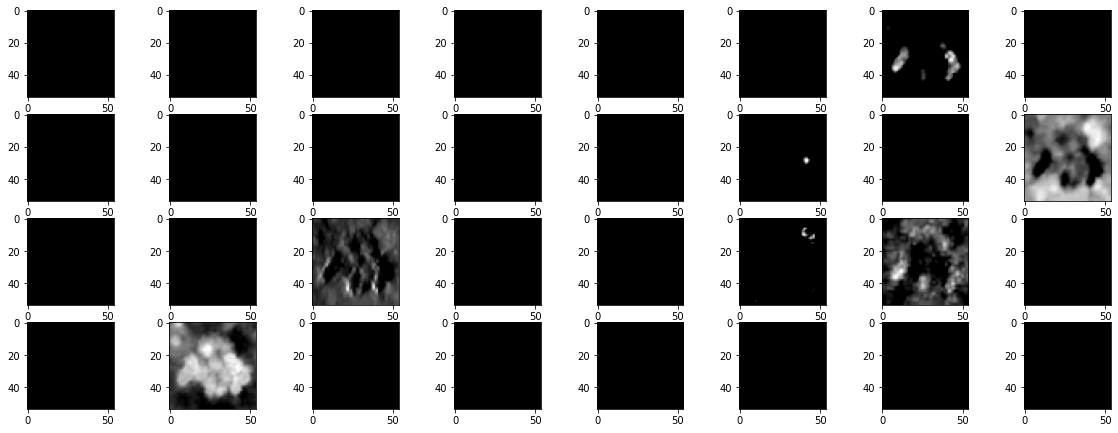

(54, 54, 32)
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17_input (InputLayer) [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 26, 26, 32

IndexError: ignored

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

In [ ]:
from PIL import Image
import tensorflow as tf

for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)



from matplotlib import pyplot
from keras.preprocessing import image
test_image = "/content/split_rgb/test/MC/cntr_high 72.jpg" 


#img_data = np.random.random(size=(100, 100, 3))
#img = tf.keras.preprocessing.image.array_to_img(img_data)
#array = tf.keras.preprocessing.image.img_to_array(img)

ip = load_img(test_image, target_size=(224, 224))
img_arr = tf.keras.preprocessing.image.img_to_array(ip)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr /= 255

activation_model = Model(inputs=model.inputs , outputs=model.layers[1].output)
activation_model.summary()

#calculating features_map
features = activation_model.predict(img_arr)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1] , cmap='gray')
    
pyplot.show()



activation_model = Model(inputs=model.inputs , outputs=model.layers[3].output)
activation_model.summary()

#calculating features_map
features = activation_model.predict(img_arr)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1] , cmap='gray')
    
pyplot.show()


layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, activation_model.predict(img_arr)):
  print(feature_map.shape)
  if len(feature_map.shape) == 2:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )


import os
blocks = [ 1, 5 , 8]
outputs = [model.layers[i].output for i in blocks]

model = Model( inputs= model.inputs, outputs = outputs)
model.summary()


feature_map = model.predict(img_arr)
for i,feature_map in zip(blocks, feature_map):
    fig = pyplot.figure(figsize=(20,15))
for i in range(1,feature_map.shape[3]+1):
    pyplot.subplot(8,8,i)
    pyplot.imshow(feature_map[0,:,:,i-1] , cmap='gray')
pyplot.show()


for layer_name, feature_map in zip(layer_names, features): 
   if len(feature_map.shape) == 4:
      k = feature_map.shape[-1]  
      size=feature_map.shape[1]
      for i in range(k):
        feature_image = feature_map[0, :, :, i]
        feature_image-= feature_image.mean()
        feature_image/= feature_image.std ()
        feature_image*=  64
        feature_image+= 128
        feature_image= np.clip(x, 0, 255).astype('uint8')
        image_belt[:, i * size : (i + 1) * size] = feature_image    

In [ ]:
model.load_weights('/content/drive/MyDrive/Skin_Cancer/TskinCNN_1_Nadam0.001_val.h5')

In [ ]:

preds = model.evaluate(val_set)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

44/44 [==============================] - 3s 61ms/step - loss: 0.0210 - accuracy: 0.9950
Loss = 0.020992523059248924
Test Accuracy = 0.9949567914009094


In [ ]:
layer_names = [layer.name for layer in model.layers]
layer_names



['conv2d_8',
 'max_pooling2d_8',
 'conv2d_9',
 'max_pooling2d_9',
 'conv2d_10',
 'max_pooling2d_10',
 'conv2d_11',
 'max_pooling2d_11',
 'flatten_2',
 'dense_4',
 'dropout_2',
 'dense_5']

In [ ]:
model.layers

In [ ]:
layer_outputs = [layer.output for layer in model.layers]

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

feature_map_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:

image_path= r"/content/split_rgb/test/MC/cntr_high 72.jpg"
ip = load_img(image_path, target_size=(224, 224))
img_arr = tf.keras.preprocessing.image.img_to_array(ip)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr /= 255
input=img_arr

In [ ]:
feature_maps = feature_map_model.predict(input)

In [ ]:
for layer_name, feature_map in zip(layer_names, feature_maps):print(f"The shape of the {layer_name} is =======>> {feature_map.shape}")

The shape of the conv2d_8 is =======>> (1, 222, 222, 16)
The shape of the max_pooling2d_8 is =======>> (1, 111, 111, 16)
The shape of the conv2d_9 is =======>> (1, 109, 109, 32)
The shape of the max_pooling2d_9 is =======>> (1, 54, 54, 32)
The shape of the conv2d_10 is =======>> (1, 52, 52, 32)
The shape of the max_pooling2d_10 is =======>> (1, 26, 26, 32)
The shape of the conv2d_11 is =======>> (1, 24, 24, 64)
The shape of the max_pooling2d_11 is =======>> (1, 12, 12, 64)
The shape of the flatten_2 is =======>> (1, 9216)
The shape of the dense_4 is =======>> (1, 1024)
The shape of the dropout_2 is =======>> (1, 1024)
The shape of the dense_5 is =======>> (1, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


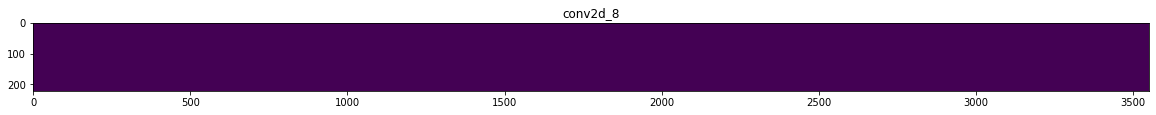

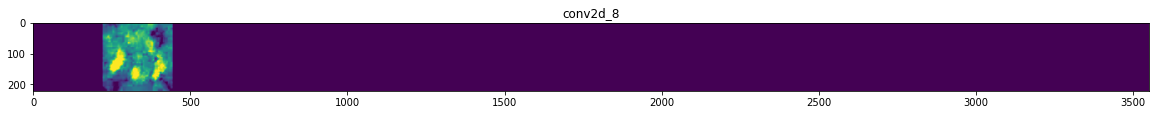

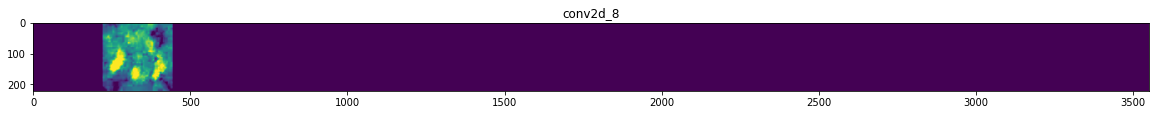

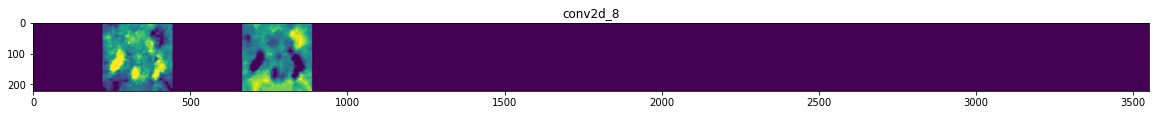

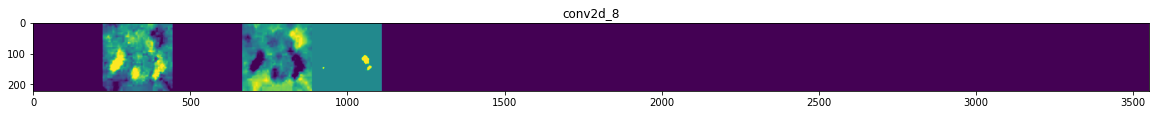

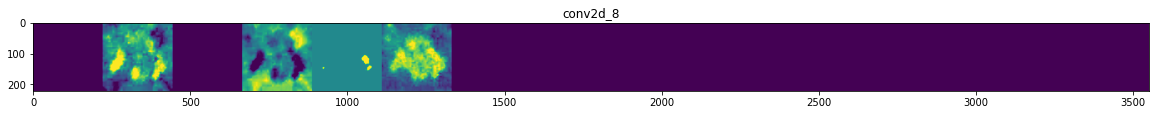

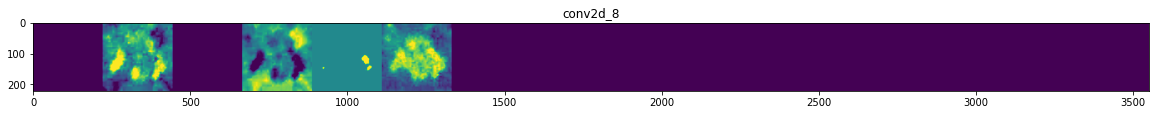

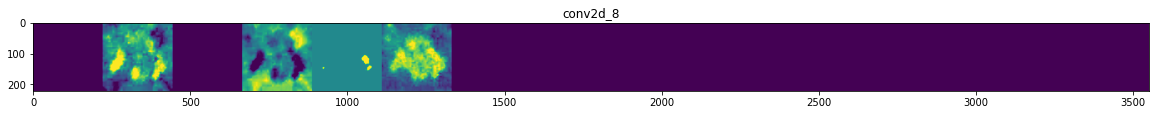

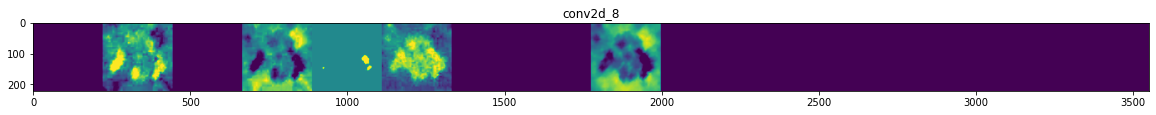

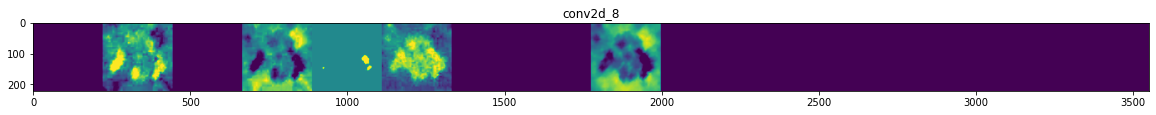

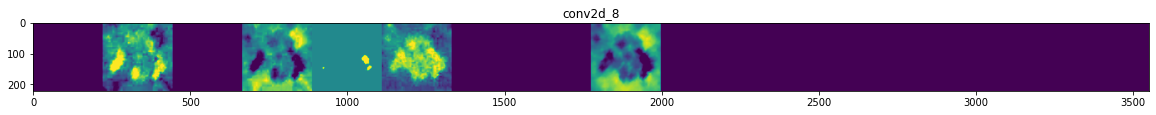

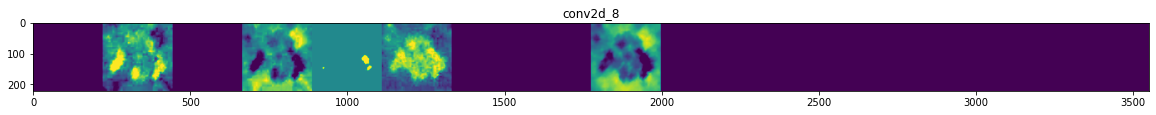

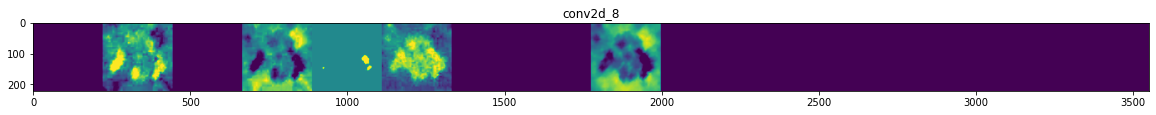

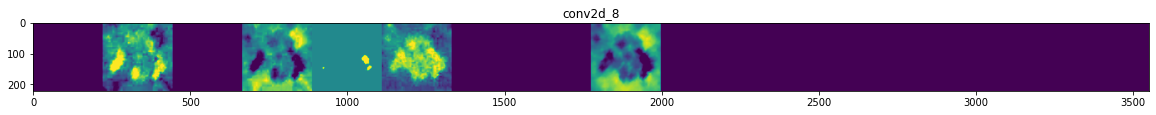

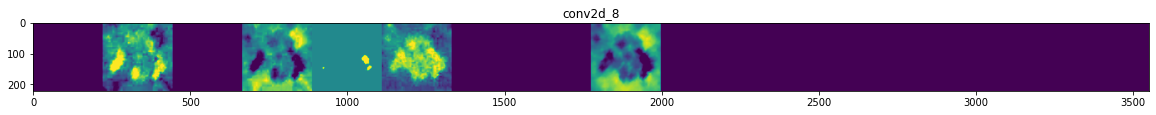

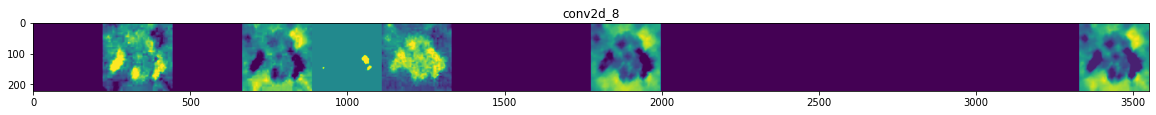

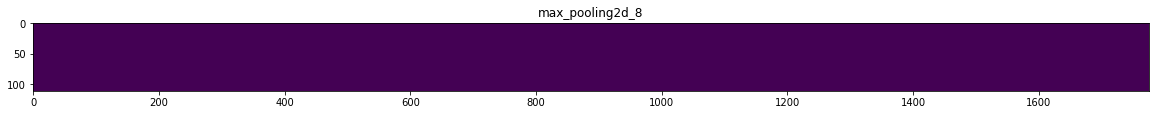

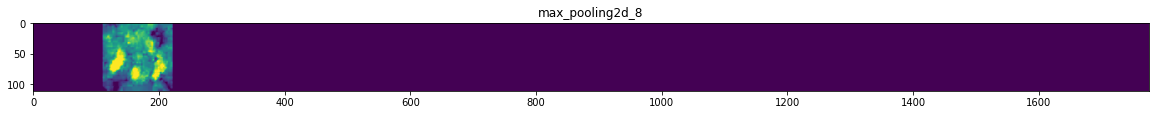

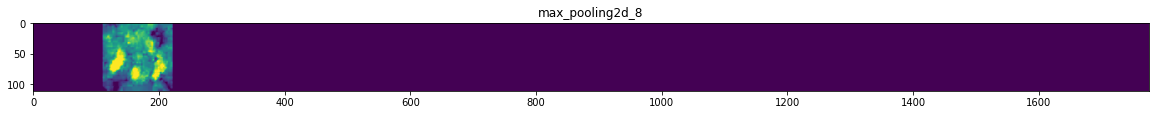

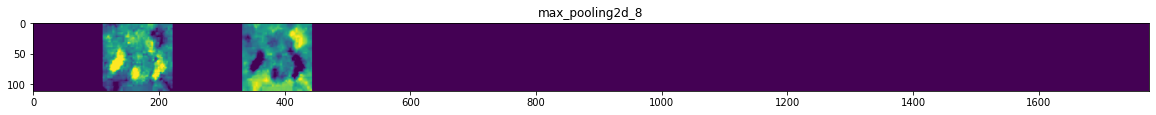

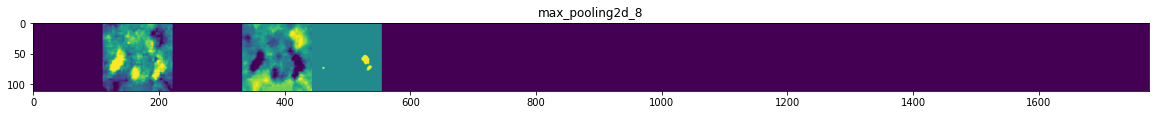

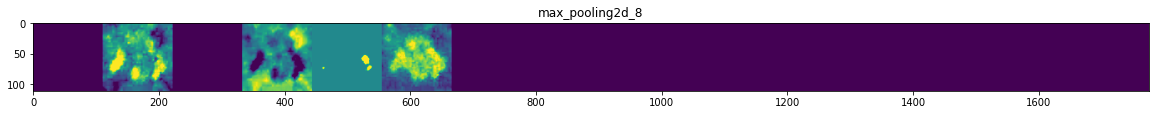

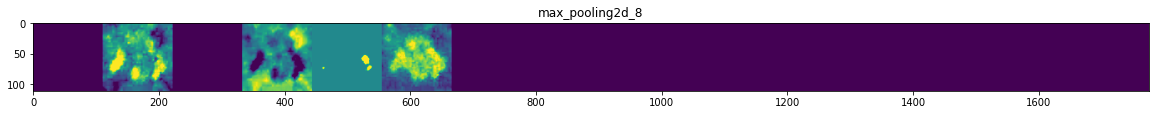

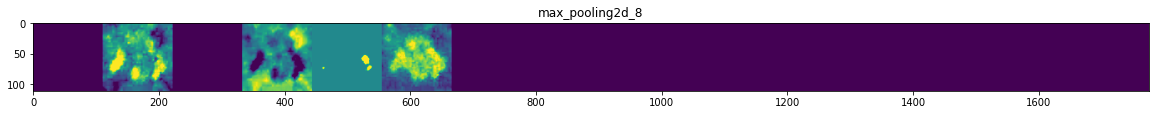

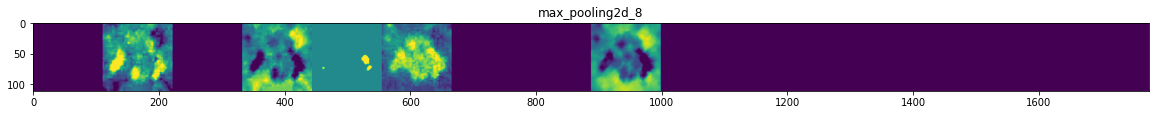

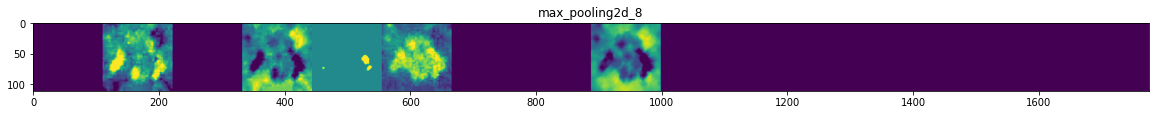

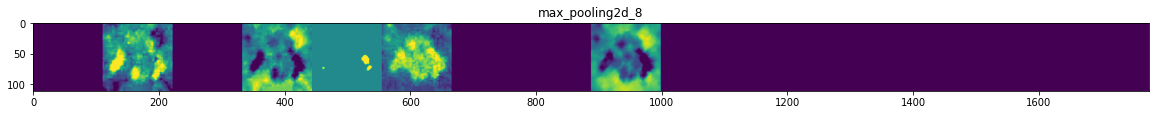

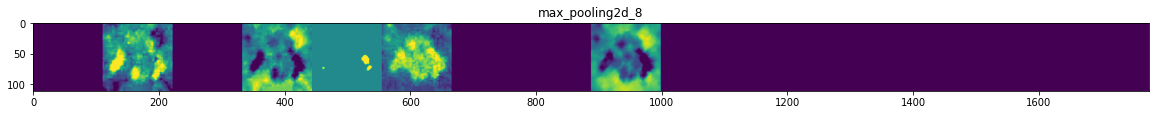

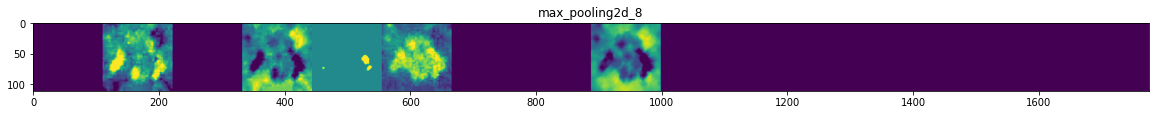

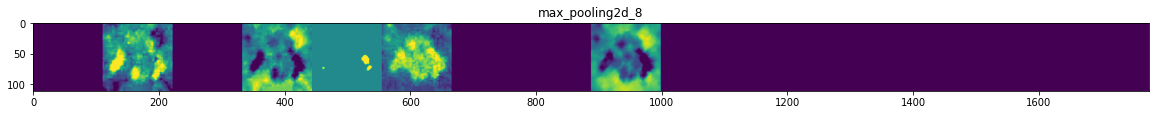

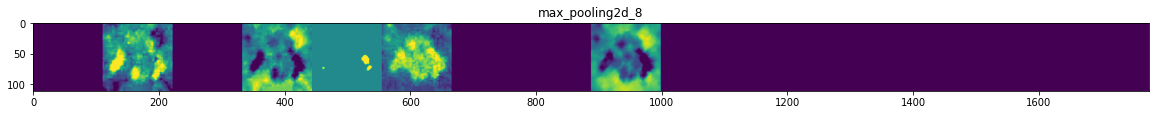

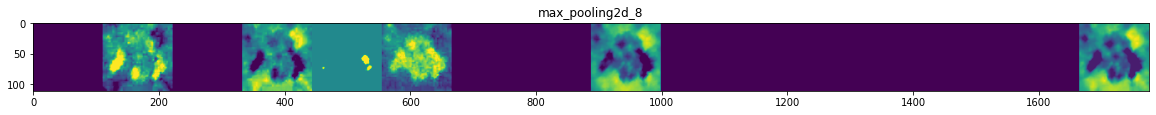

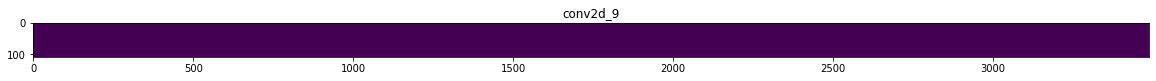

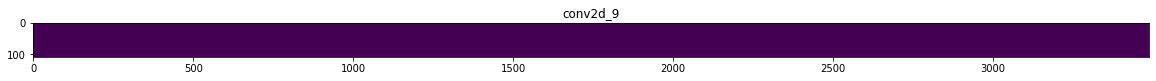

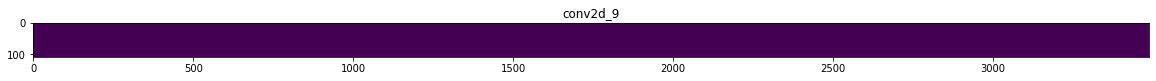

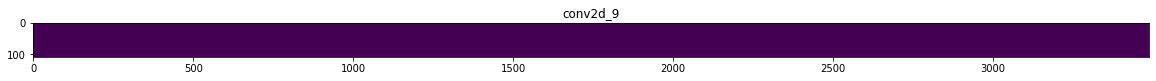

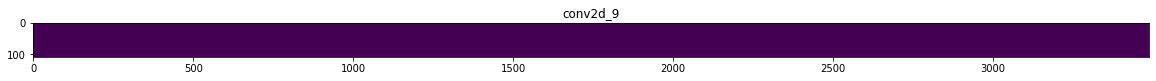

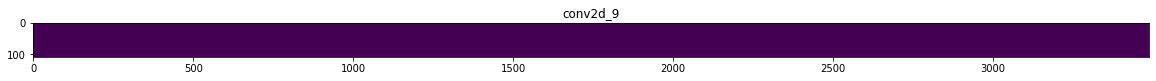

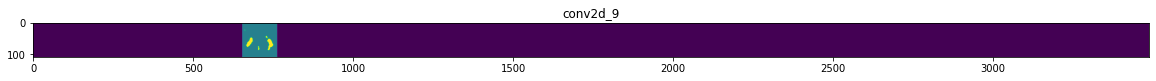

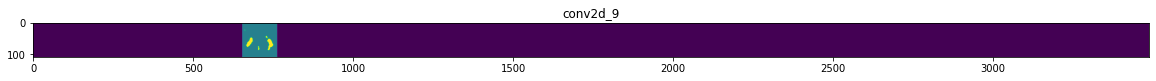

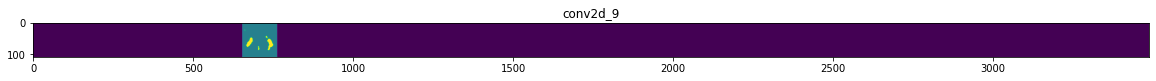

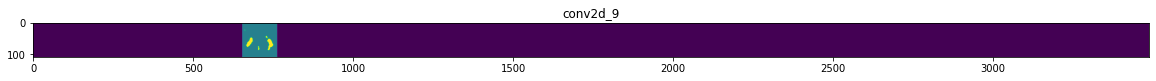

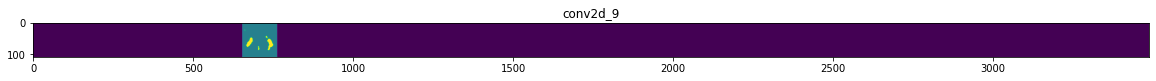

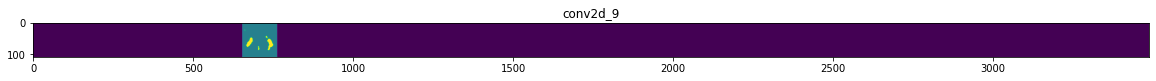

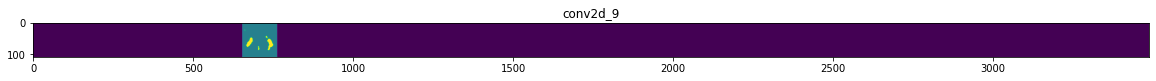

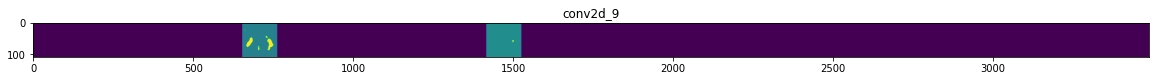

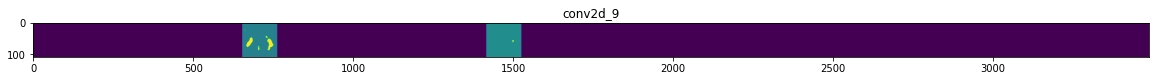

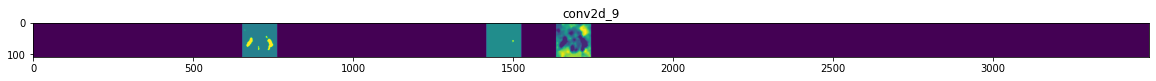

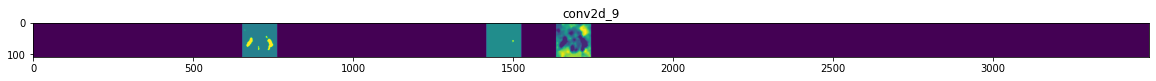

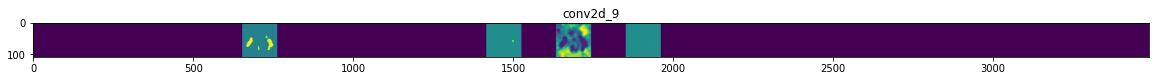

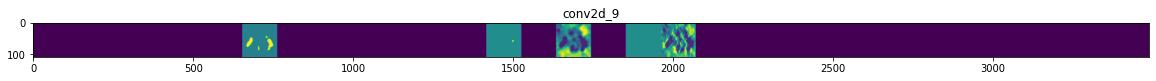

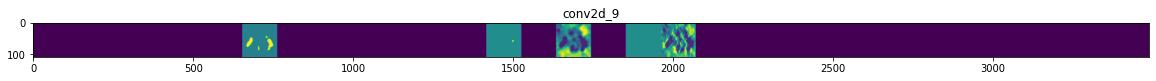

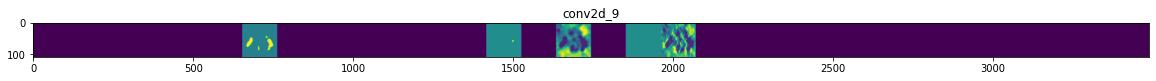

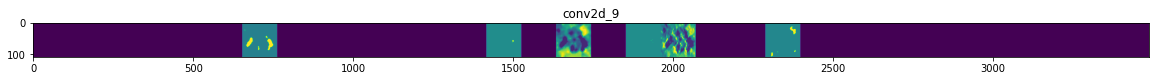

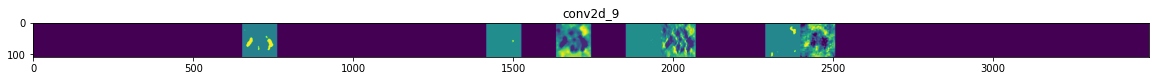

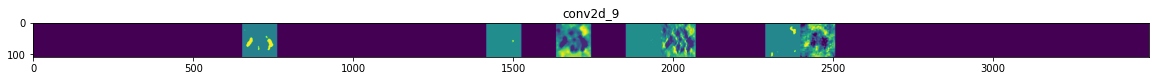

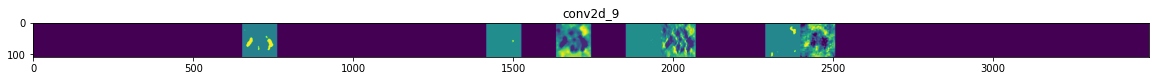

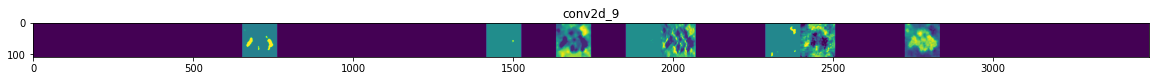

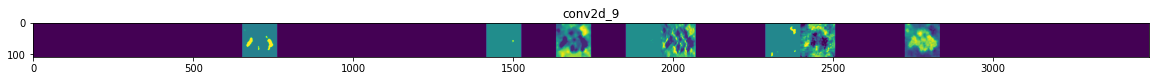

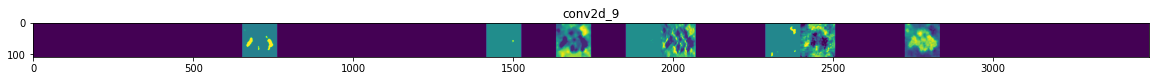

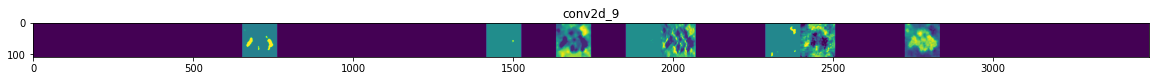

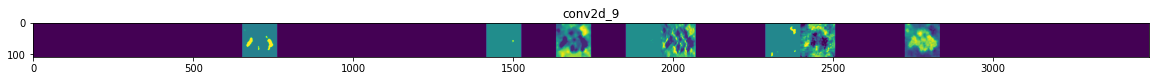

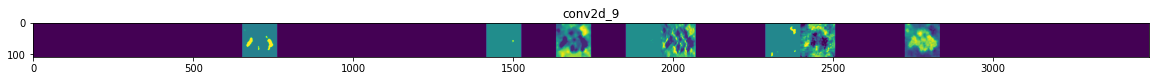

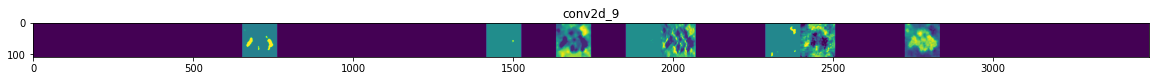

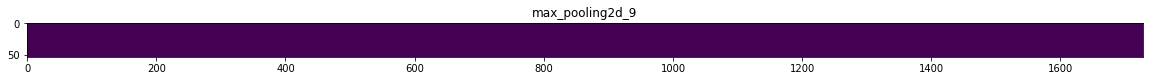

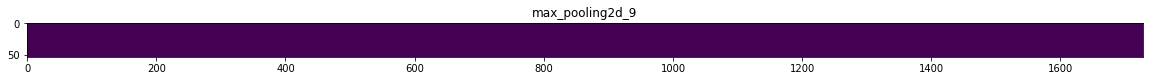

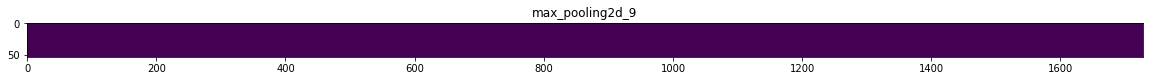

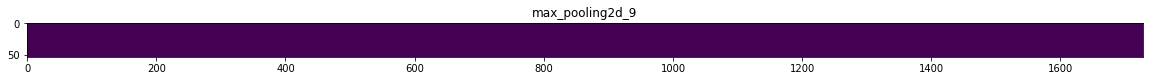

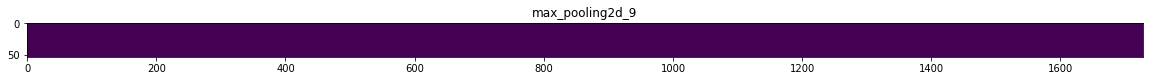

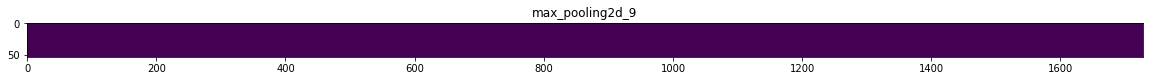

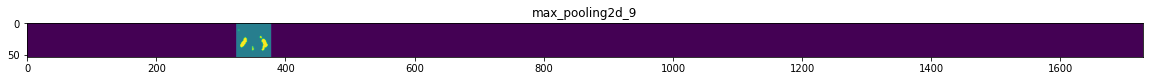

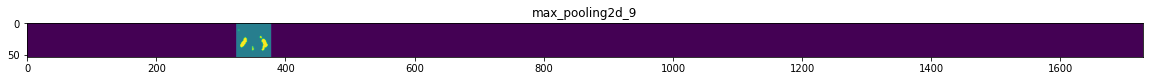

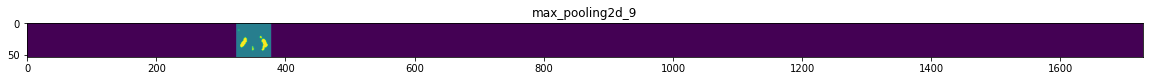

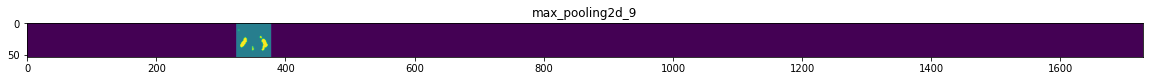

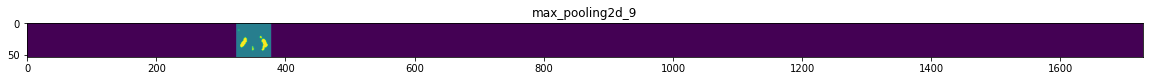

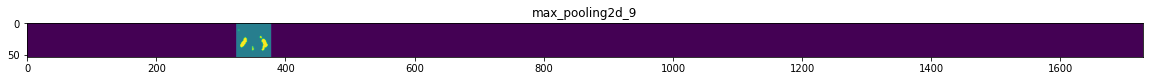

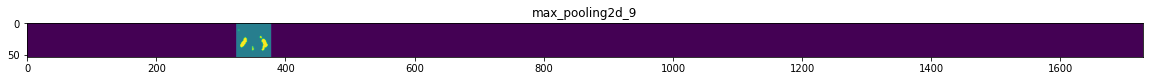

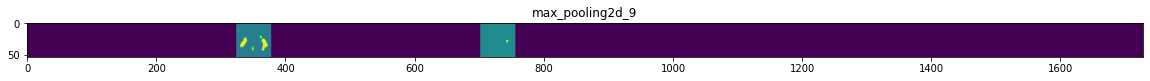

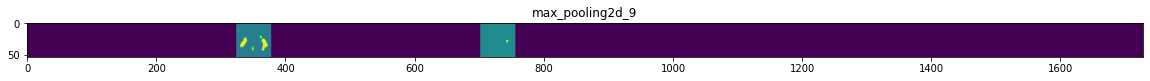

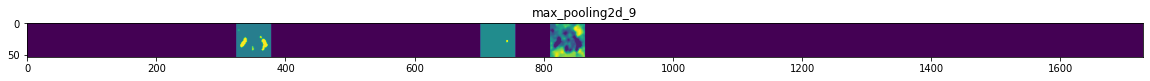

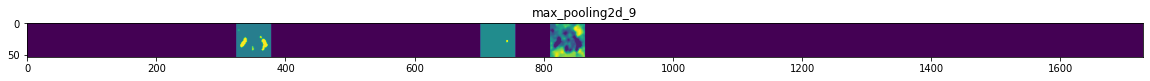

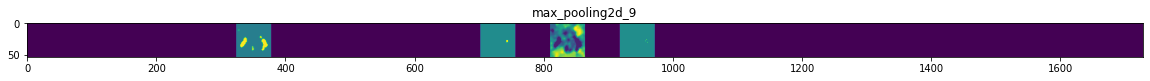

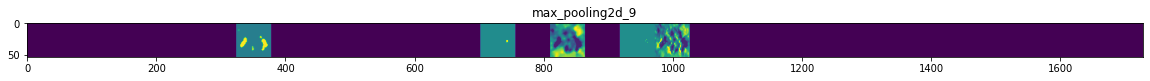

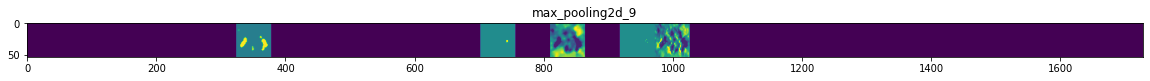

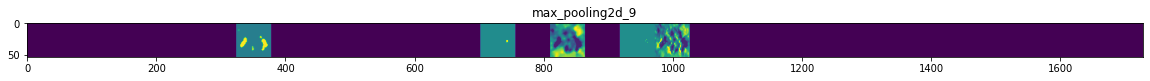

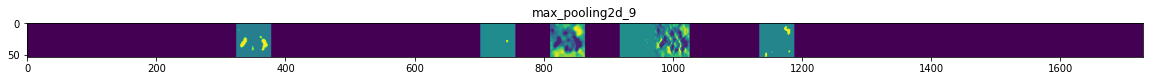

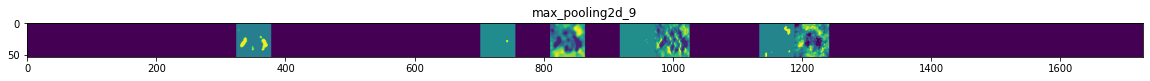

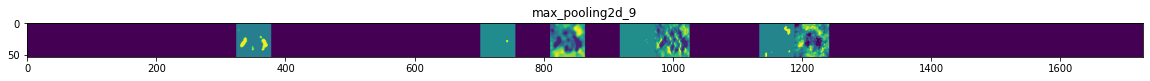

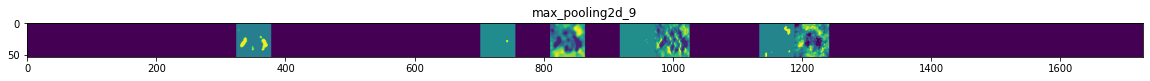

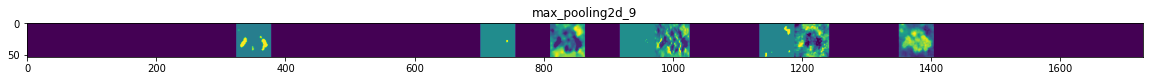

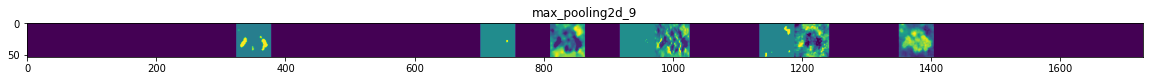

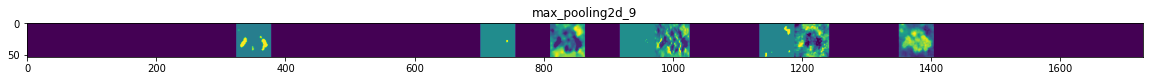

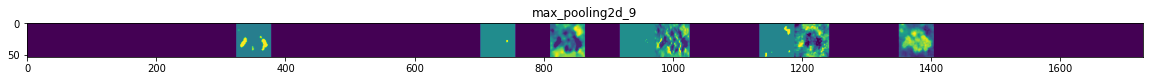

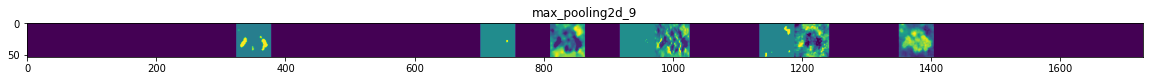

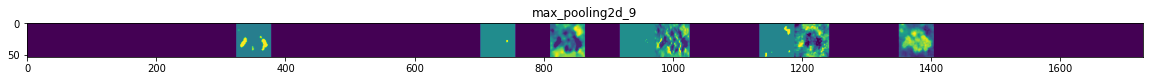

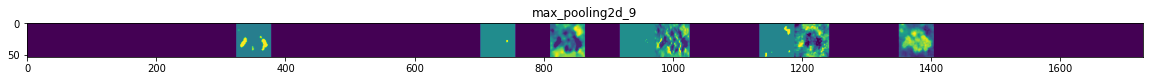

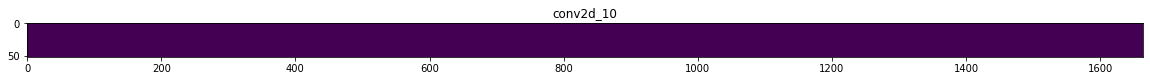

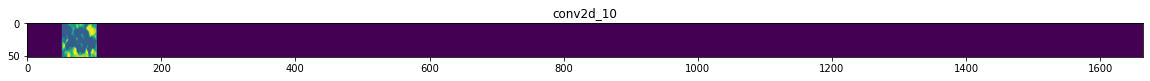

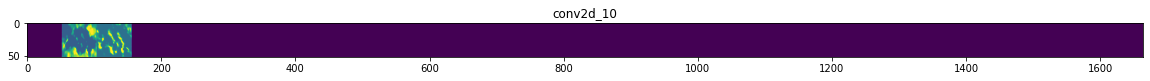

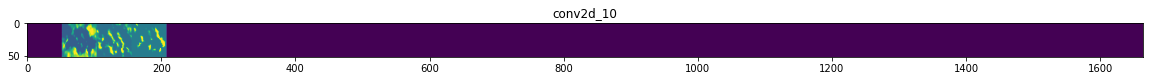

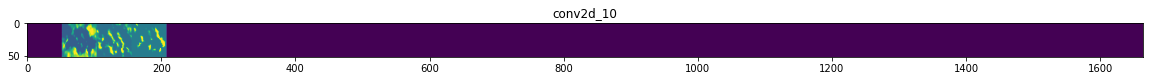

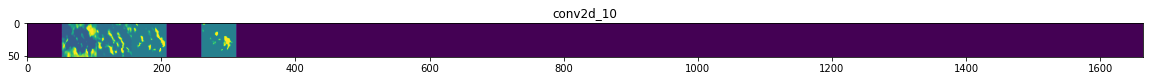

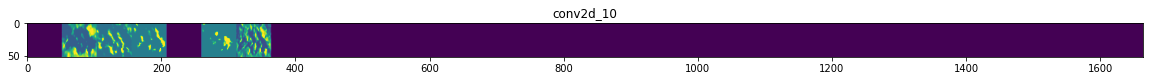

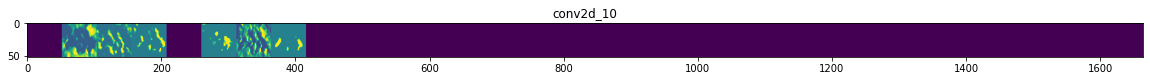

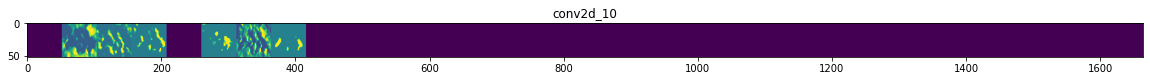

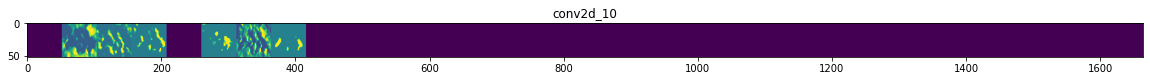

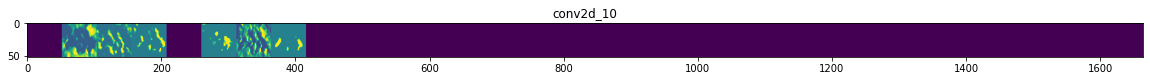

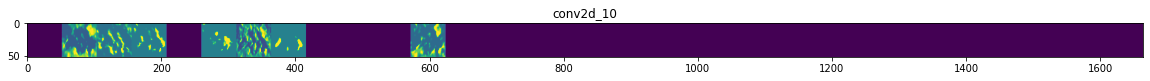

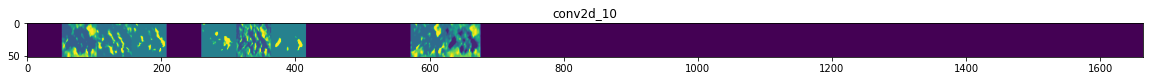

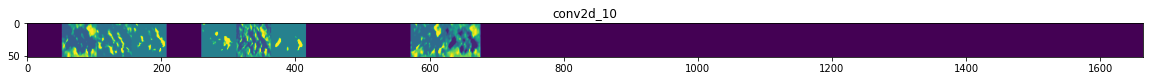

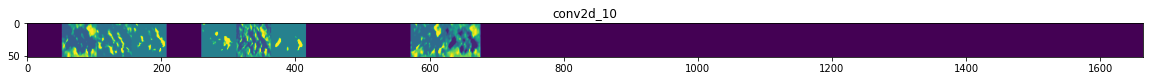

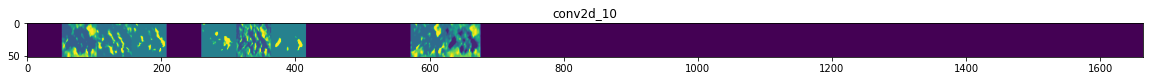

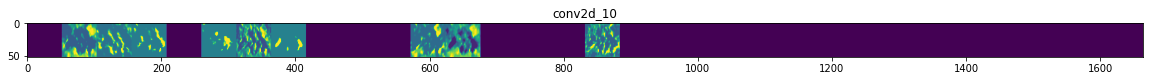

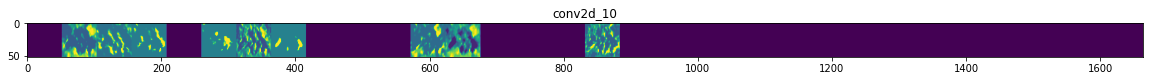

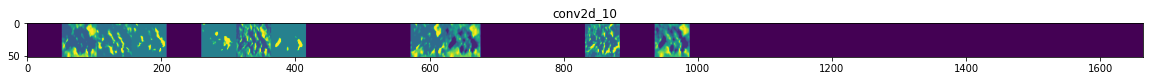

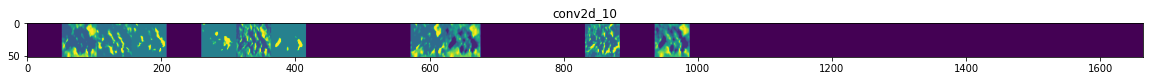

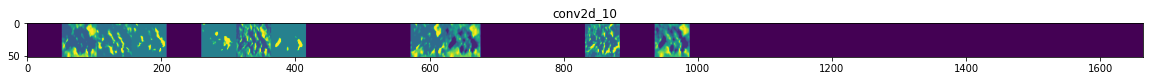

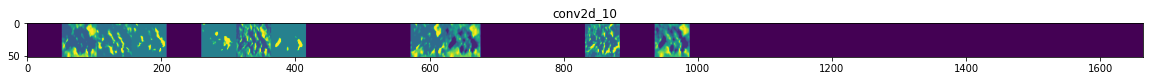

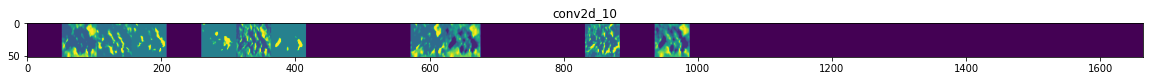

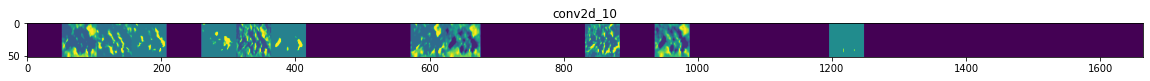

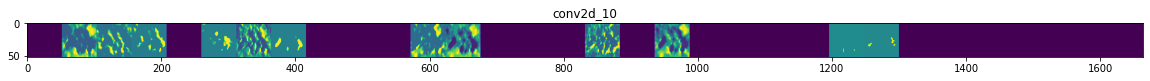

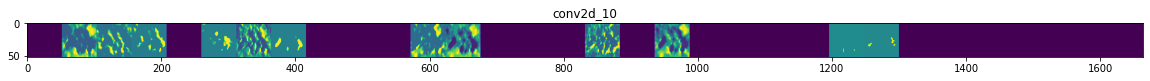

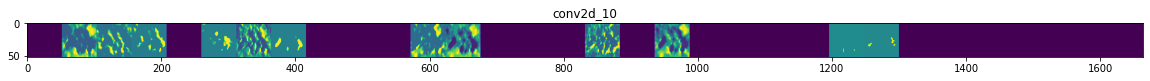

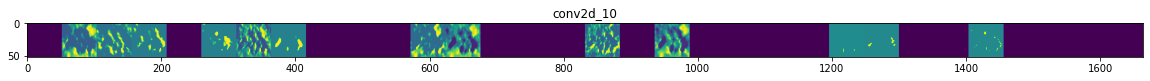

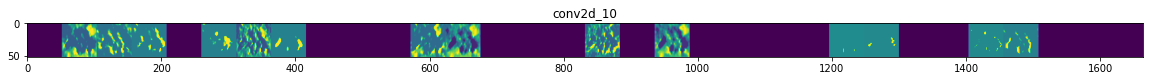

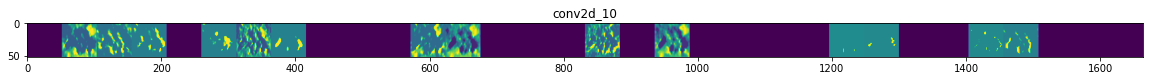

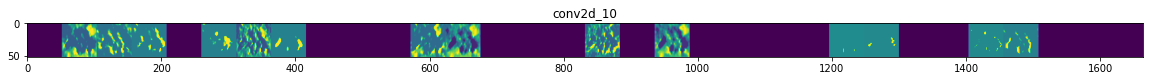

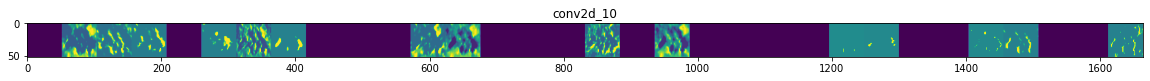

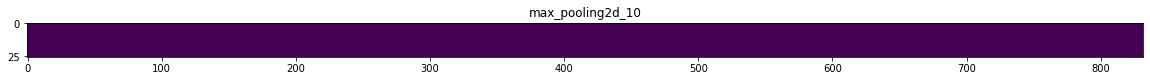

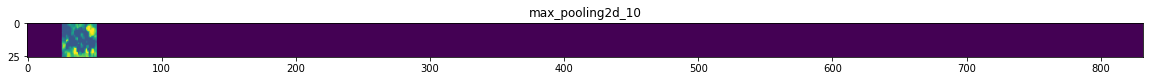

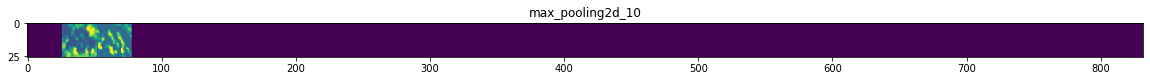

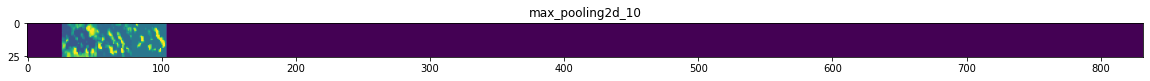

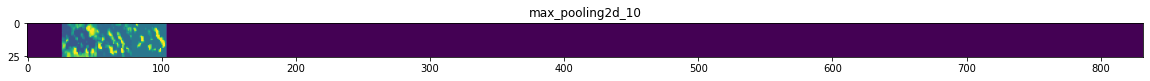

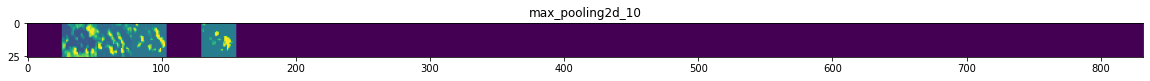

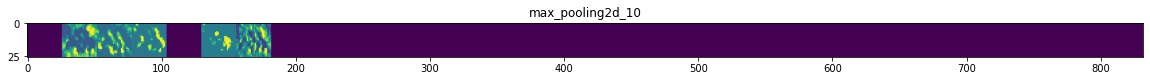

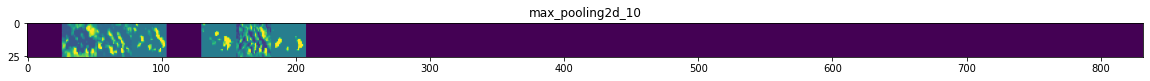

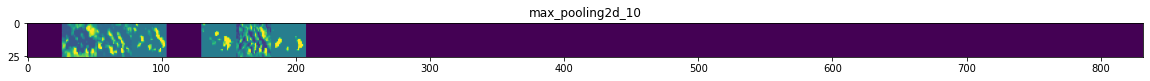

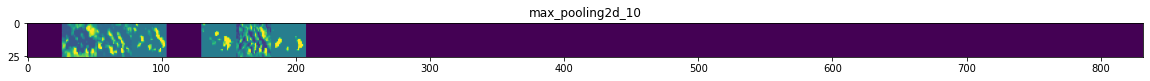

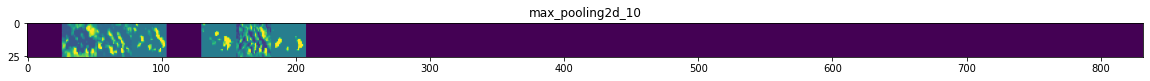

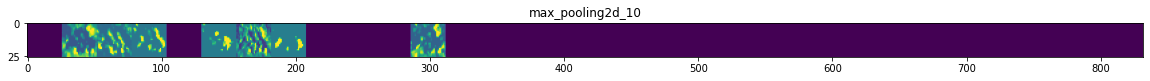

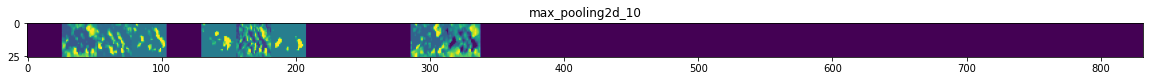

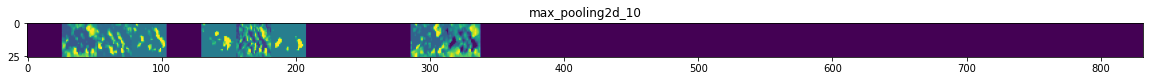

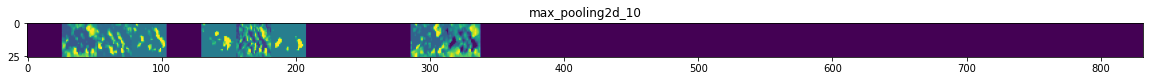

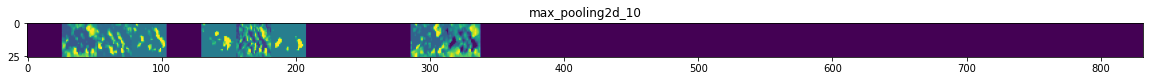

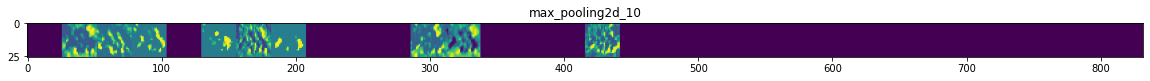

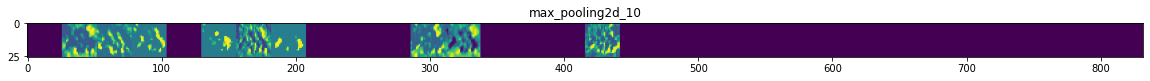

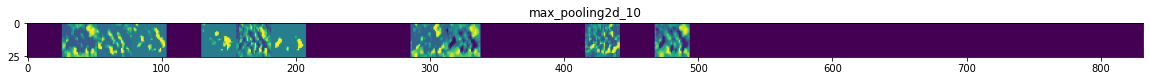

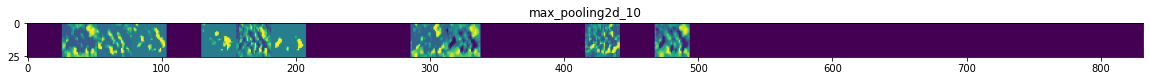

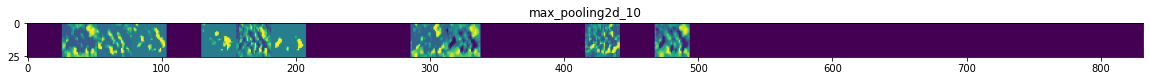

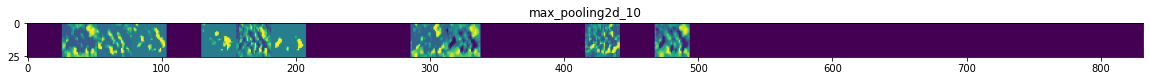

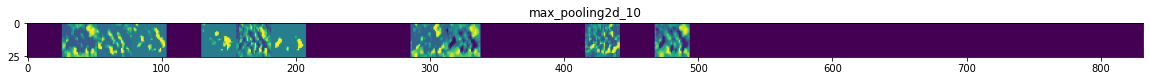

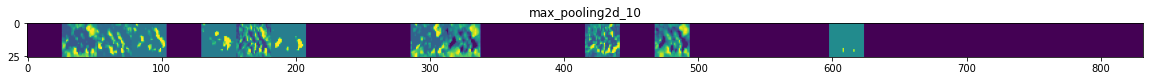

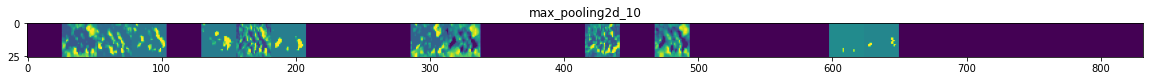

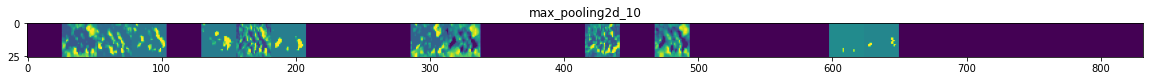

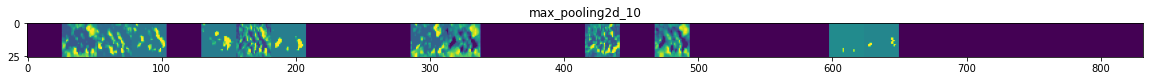

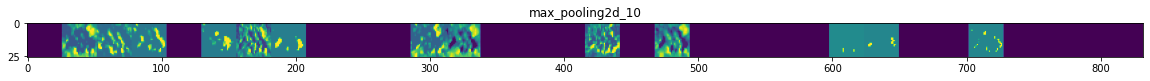

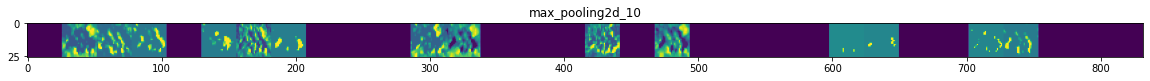

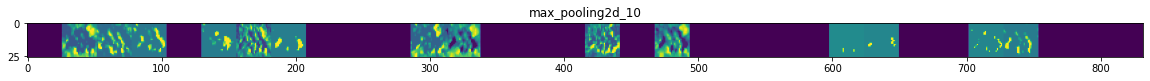

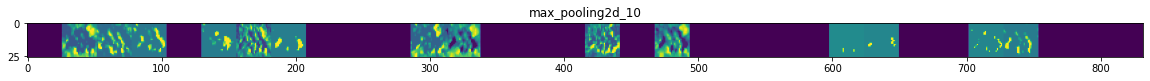

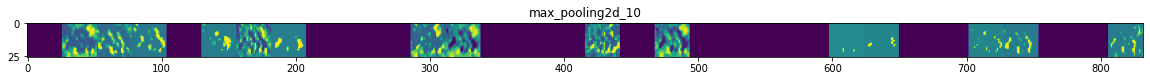

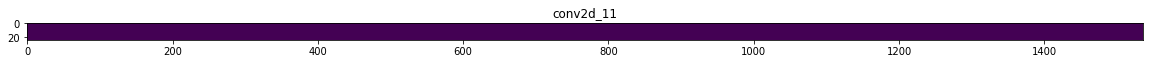

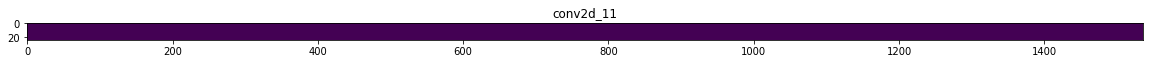

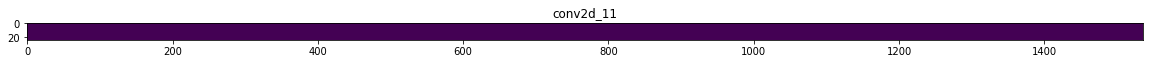

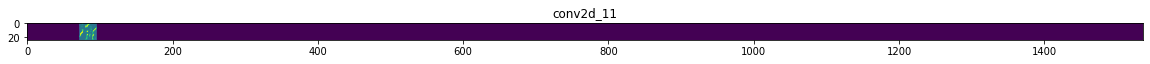

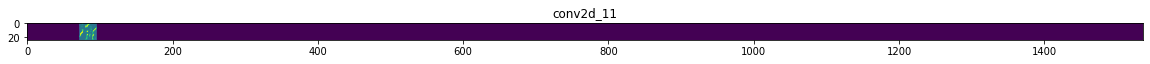

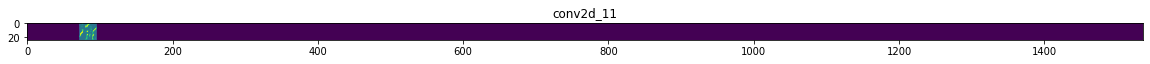

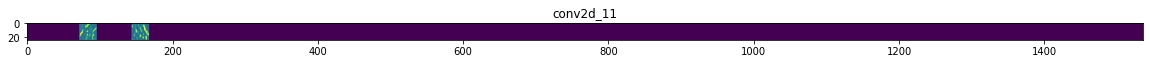

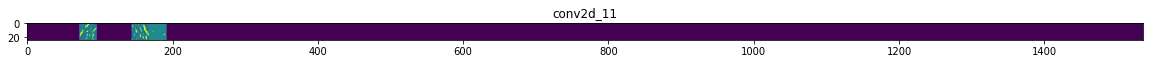

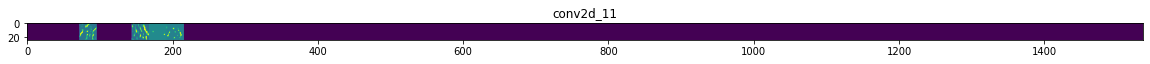

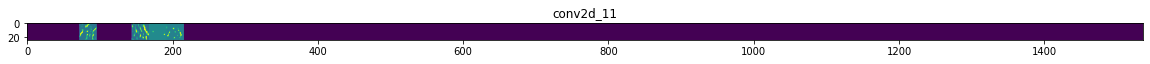

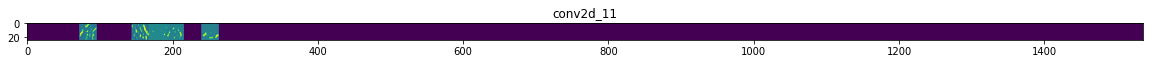

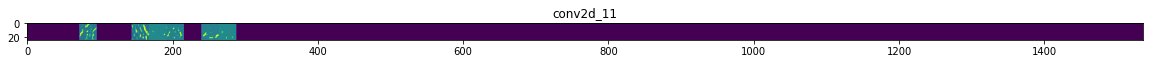

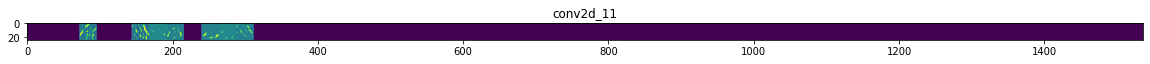

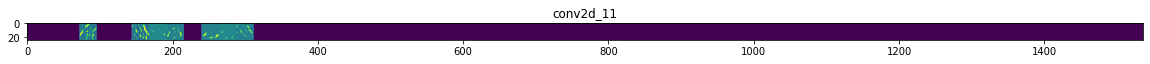

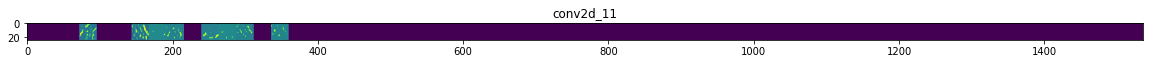

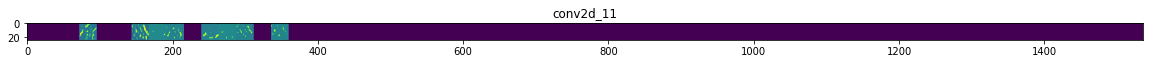

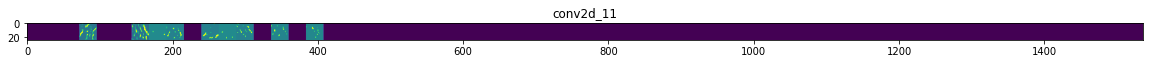

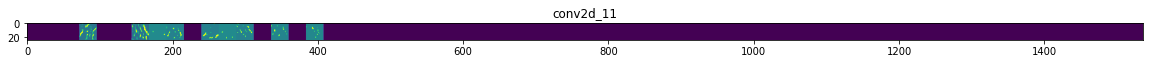

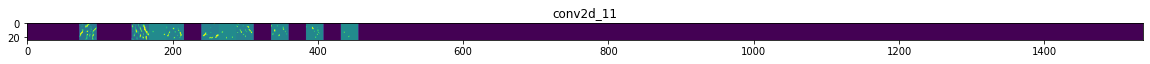

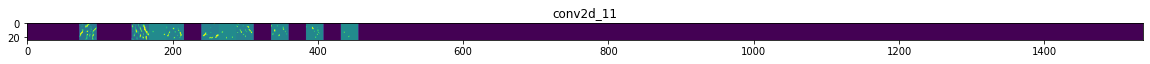

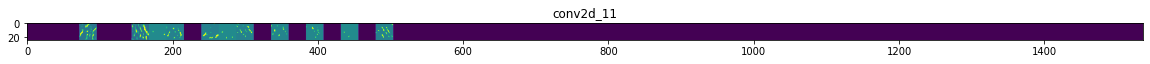

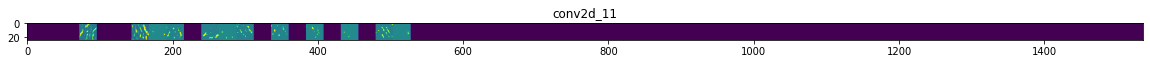

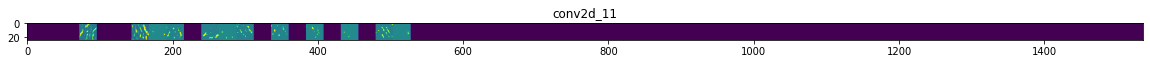

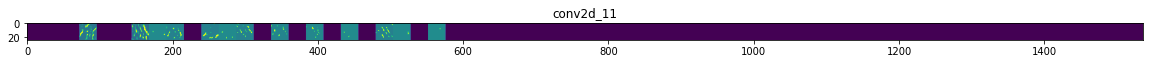

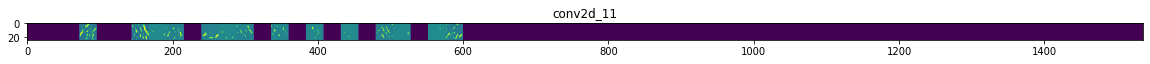

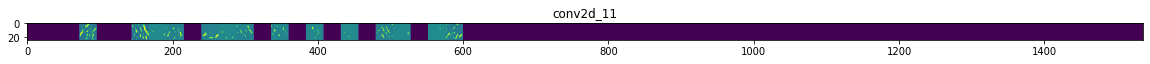

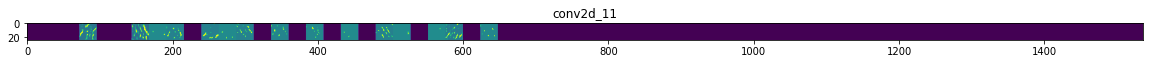

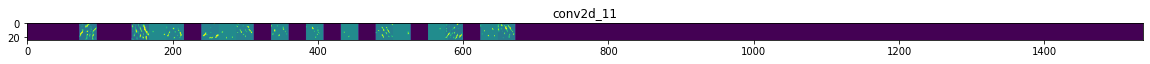

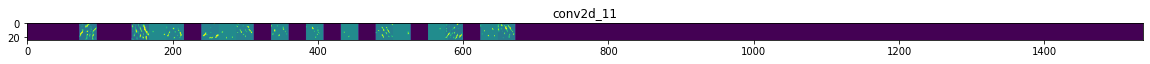

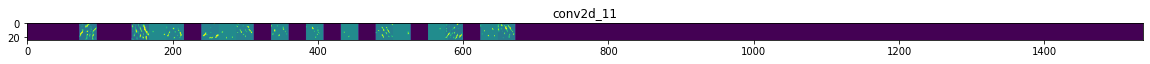

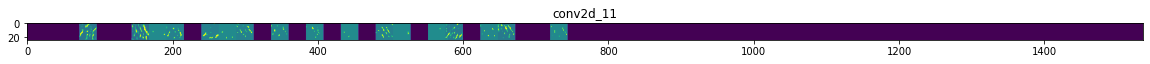

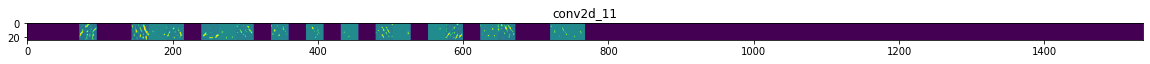

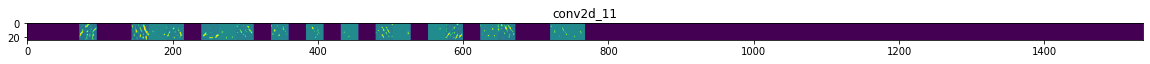

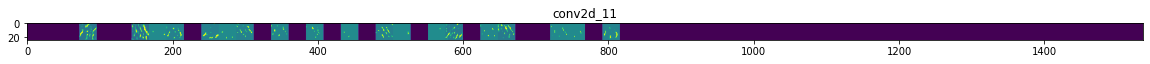

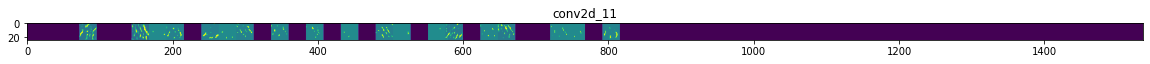

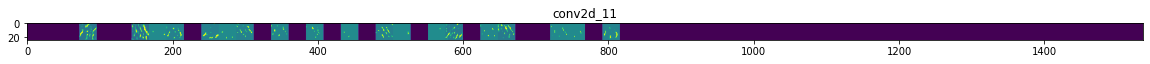

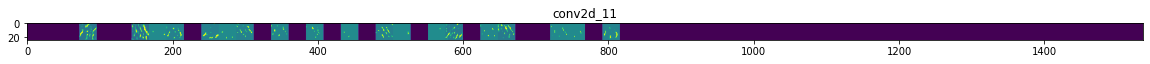

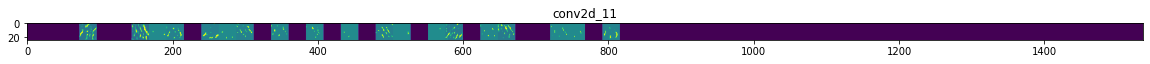

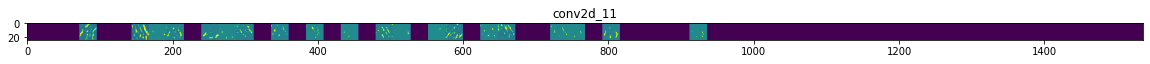

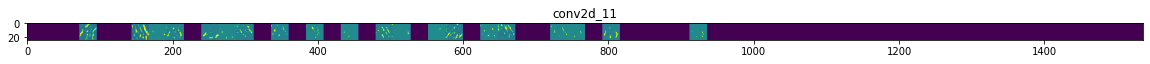

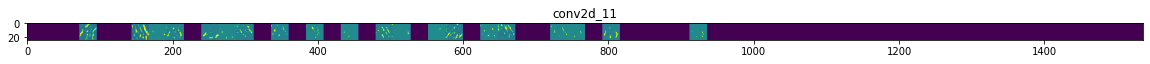

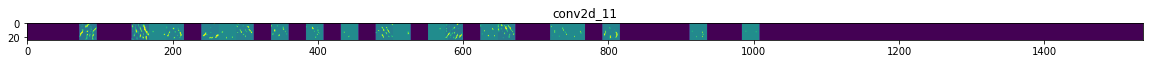

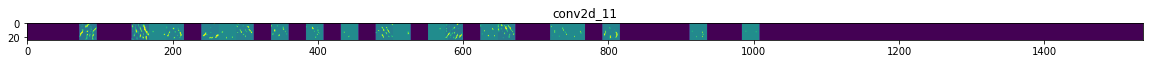

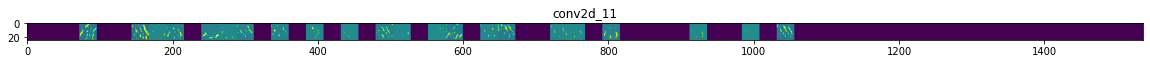

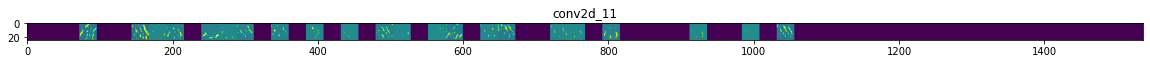

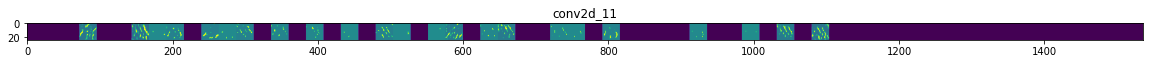

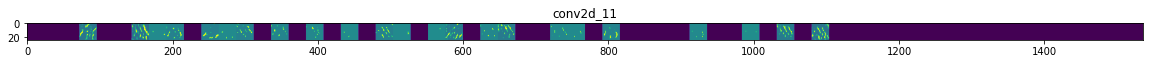

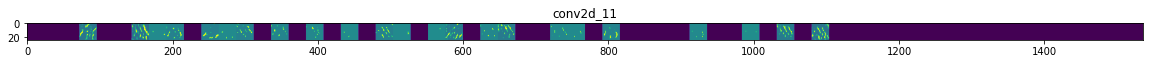

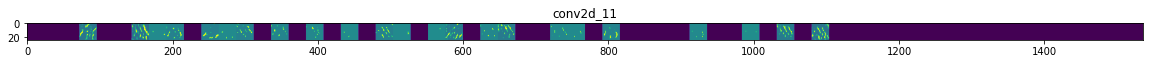

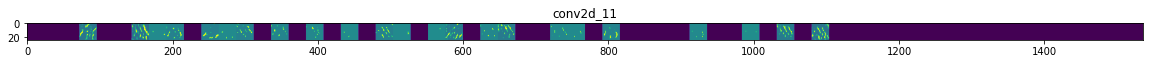

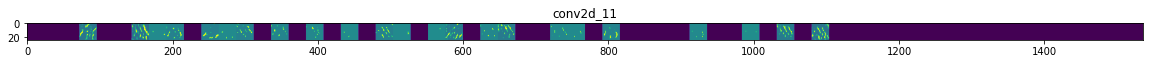

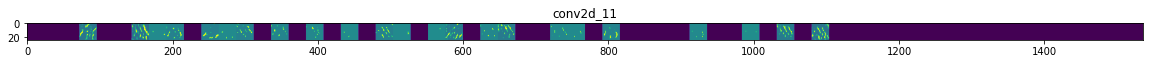

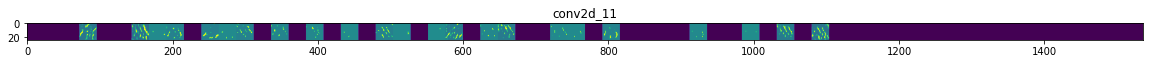

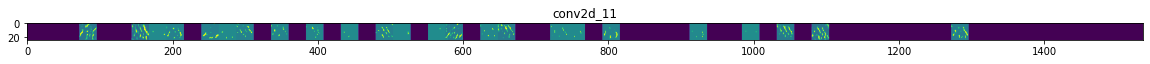

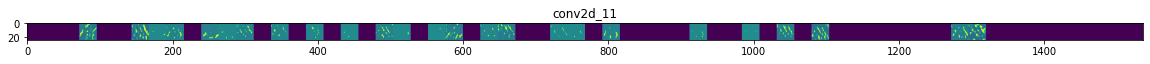

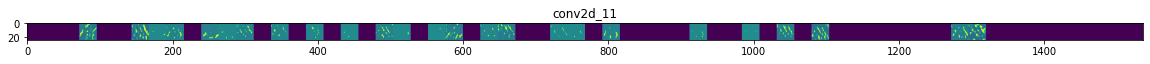

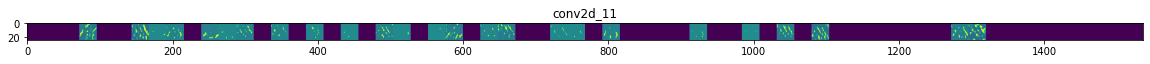

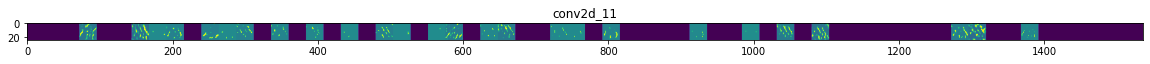

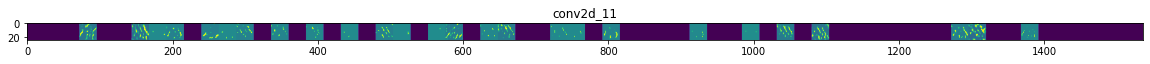

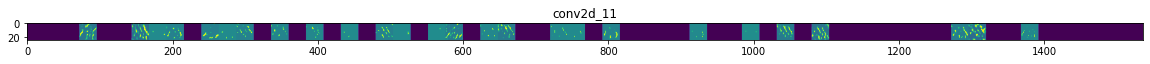

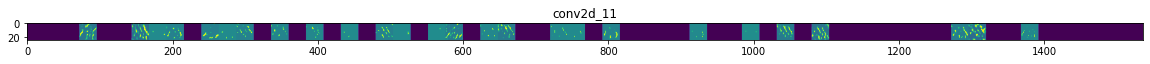

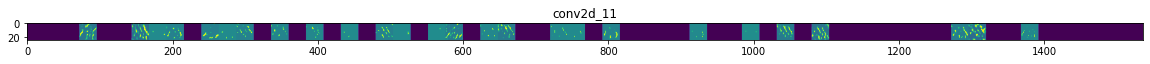

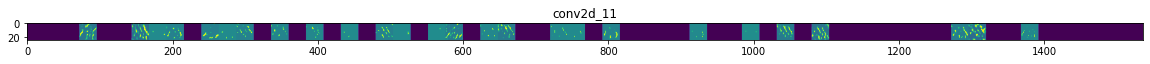

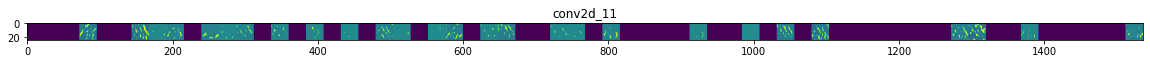

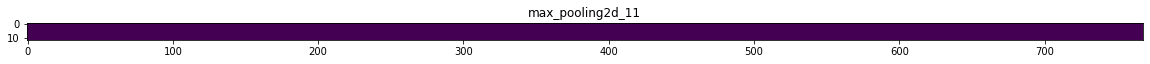

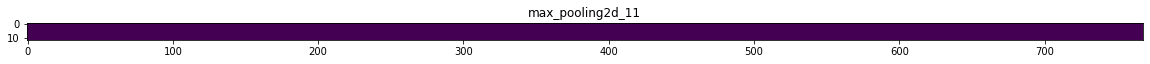

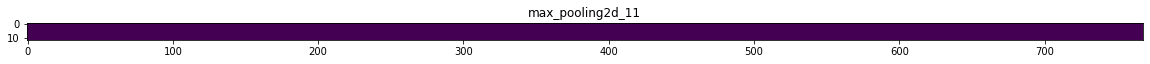

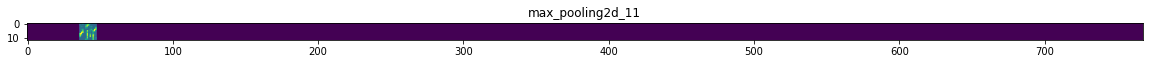

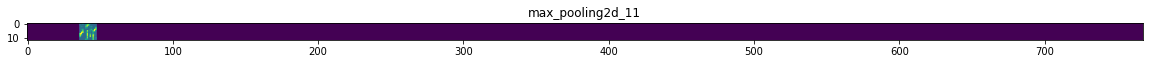

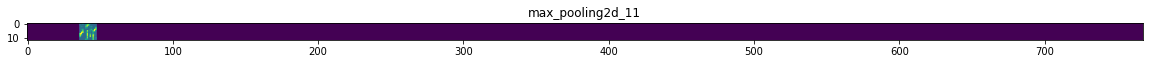

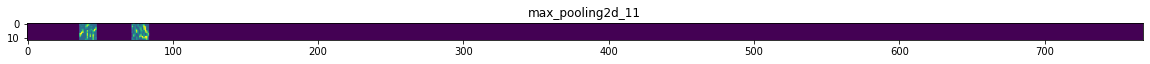

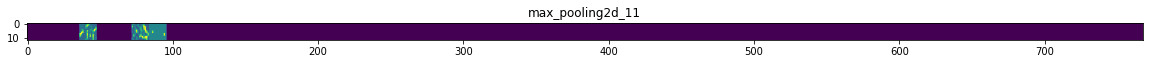

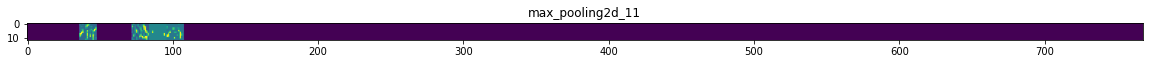

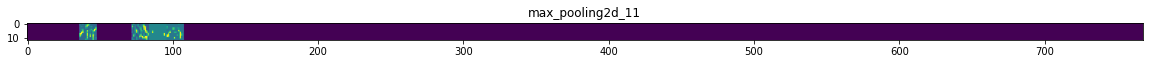

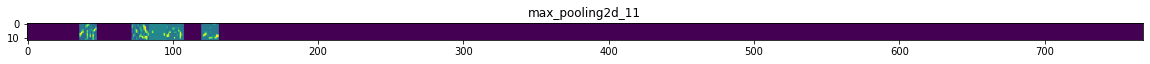

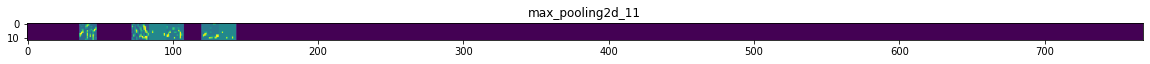

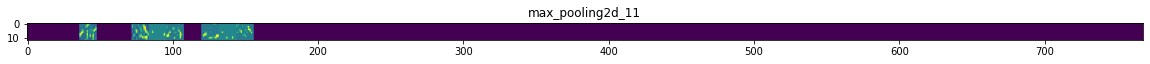

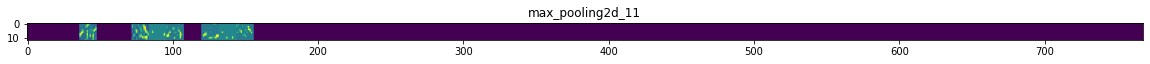

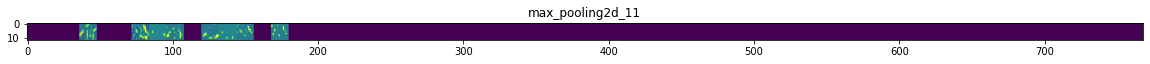

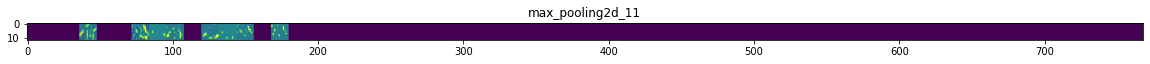

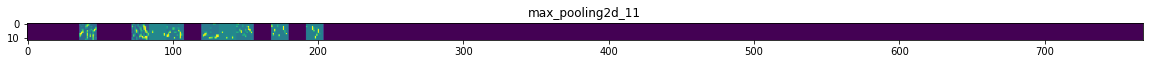

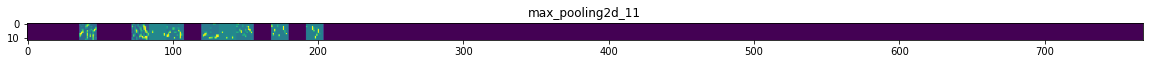

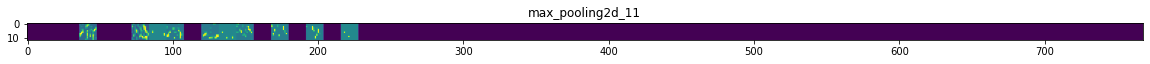

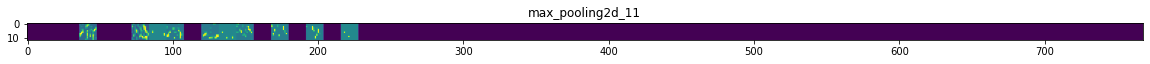

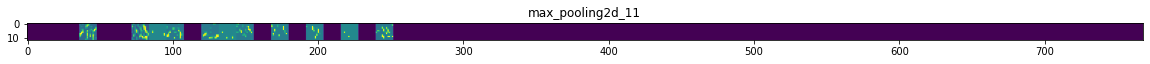

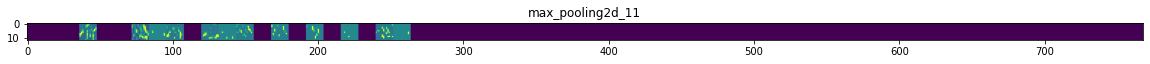

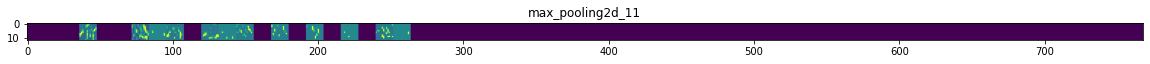

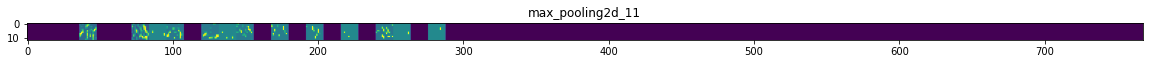

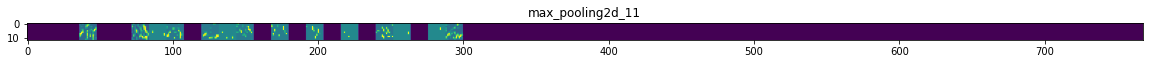

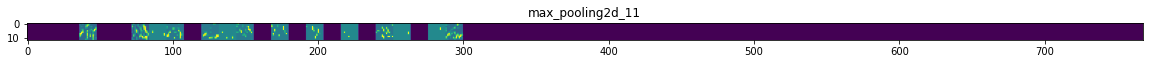

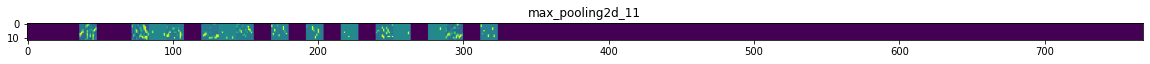

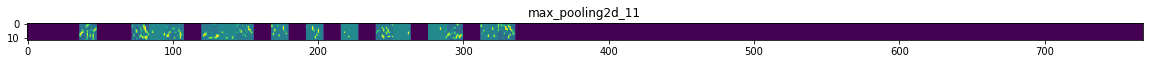

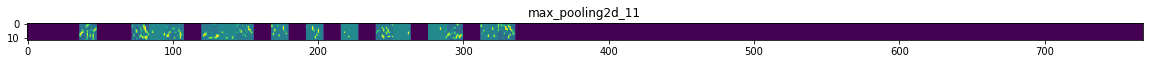

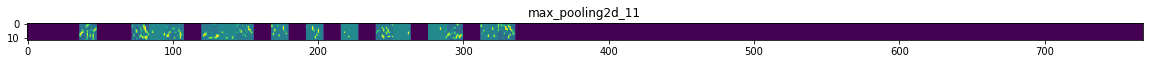

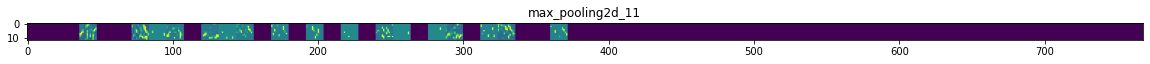

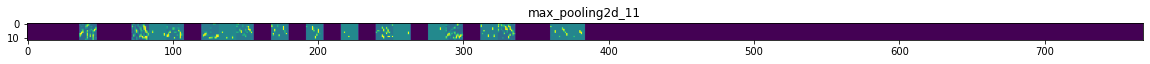

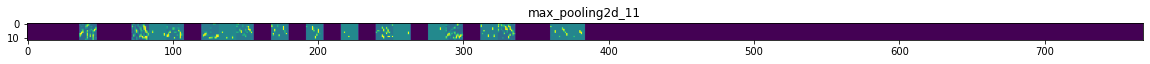

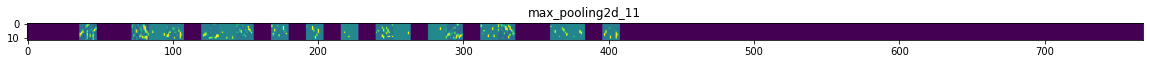

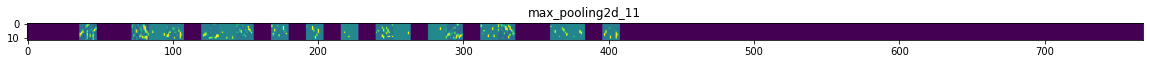

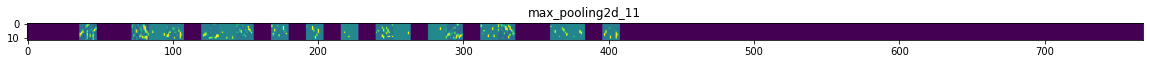

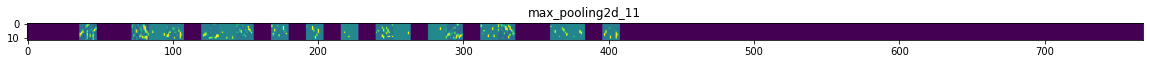

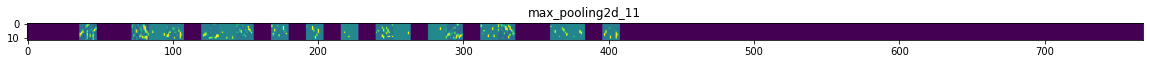

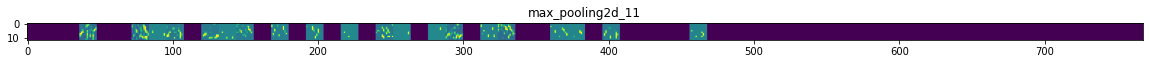

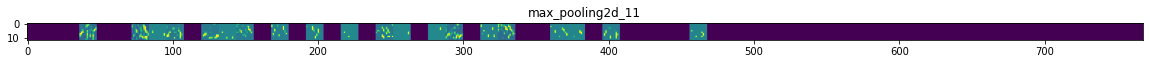

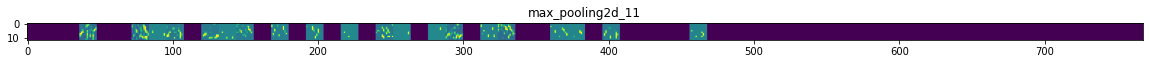

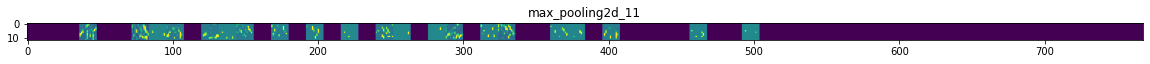

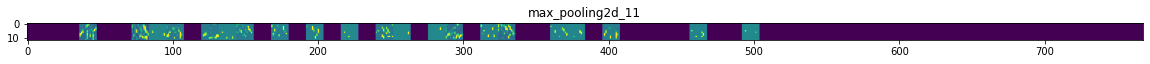

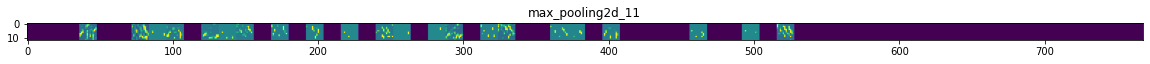

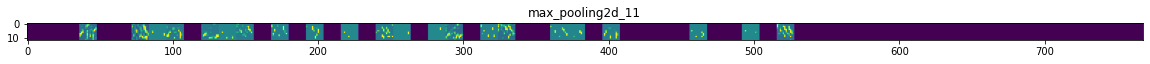

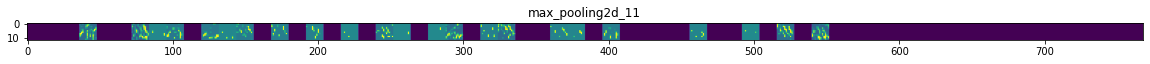

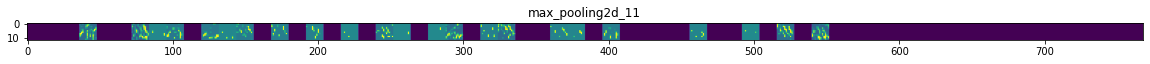

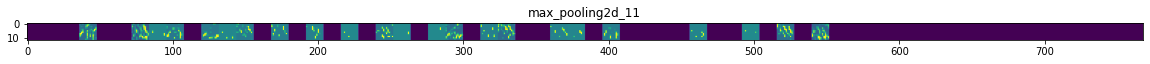

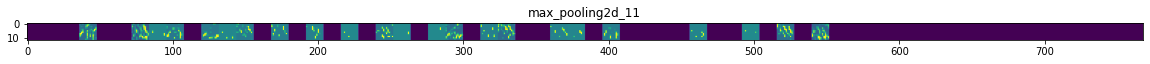

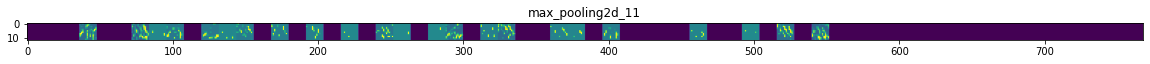

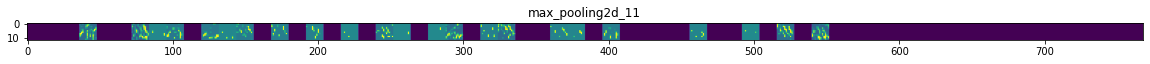

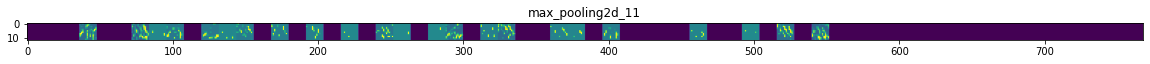

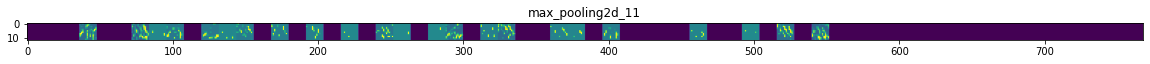

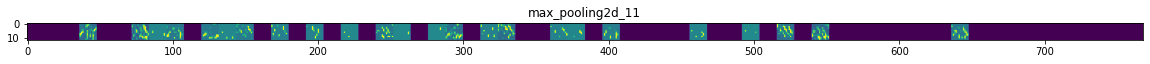

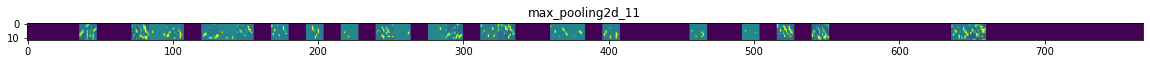

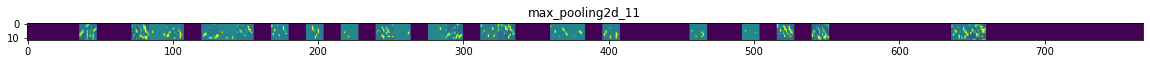

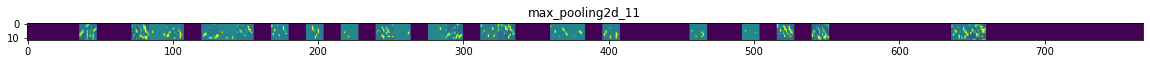

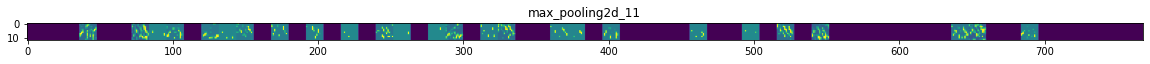

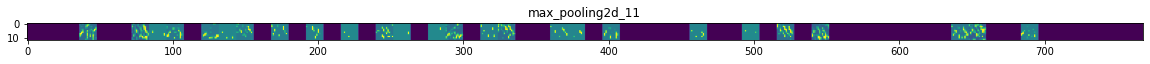

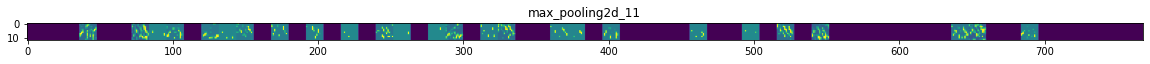

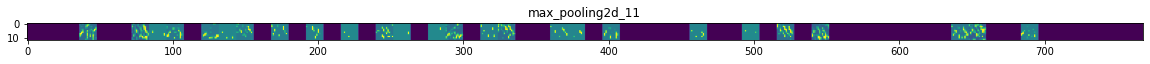

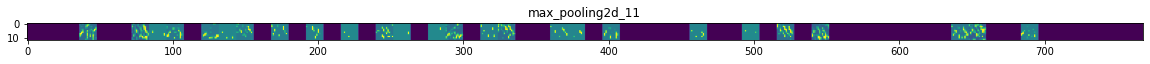

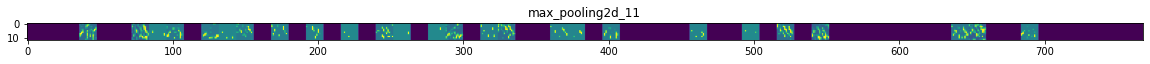

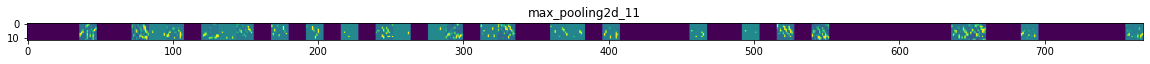

In [ ]:
for layer_name, feature_map in zip(layer_names, feature_maps):  
  if len(feature_map.shape) == 4:
      n_features = feature_map.shape[-1]  # number of features in the feature map
      size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
      image_belt = np.zeros((size, size * n_features))
      k = feature_map.shape[-1]  
      size=feature_map.shape[1]
      for i in range(k):
        feature_image = feature_map[0, :, :, i]
        feature_image-= feature_image.mean()
        feature_image/= feature_image.std ()
        feature_image*=  64
        feature_image+= 128
        feature_image= np.clip(feature_image, 0, 255).astype('uint8')
        image_belt[:, i * size : (i + 1) * size] = feature_image  

        scale = 20. / k
        plt.figure( figsize=(scale * k, scale) )
        plt.title ( layer_name )
        plt.grid  ( False )
        plt.imshow( image_belt, aspect='auto')

In [ ]:
model.load_weights('/content/drive/MyDrive/Skin_Cancer/Weights/TskinCNN_Adam0.001_val.h5')


In [ ]:
preds = model.evaluate_generator(val_set)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Loss = 0.04644783213734627
Test Accuracy = 0.9870316982269287


In [ ]:
#######confusion

import pandas as pd
import seaborn as sn
import tensorflow as tf



#model.load_weights('/content/drive/MyDrive/Modle_Weights/final2_valmax (1).h5')

#model= tf.keras.models.load_model('/content/drive/MyDrive/Modle_Weights/final2_valmax (1).h5')
filenames=test_set.filenames
nb_samples=len(test_set)
y_prob=[]
y_act=[]
test_set.reset()
for _ in range (nb_samples):
    X_test,Y_test = test_set.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)
    
predicted_class=[list(training_set.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class=[list(training_set.class_indices.keys())[i.argmax()]for i in y_act]

out_df=pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix=pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])


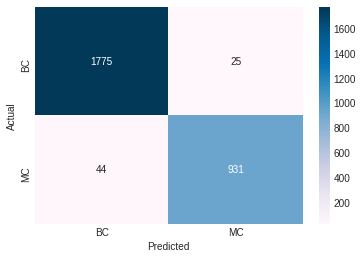

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

sn.heatmap(confusion_matrix,cmap='PuBu', annot=True, fmt='d')
plt.show()
plt.savefig('/content/drive/MyDrive/model weights/vgg16_AugGfb_split1_maxval_3')

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.datasets import make_classification

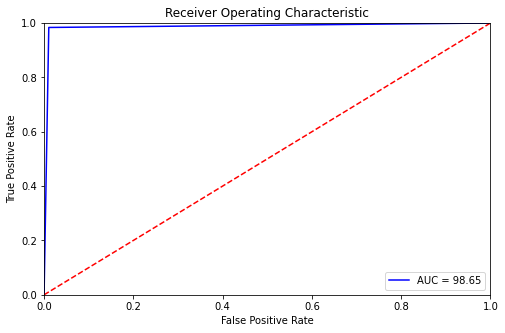

In [ ]:
#####ROC CUrve

#probabilities = model.predict_proba(test_set)
#probabilities = model.predict_proba(np.array(test_set)) 
#predictions = np.argmax(probabilities, axis=1)
#predictions = probabilities[:, 1]
#print(predictions) 
fpr, tpr, threshold = metrics.roc_curve(y_val, probaa) 
roc_auc = metrics.auc(fpr, tpr) 
roc_auc*=100
plt.figure(figsize=(8,5))
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc) 
plt.legend(loc='lower right') 
plt.plot([0, 1], [0, 1], 'r--') 
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.savefig('/content/drive/MyDrive/Skin_Cancer/superpc/roc.png', dpi = 300)
plt.show()
#plt.savefig('/content/drive/MyDrive/Skin_Cancer/superpc/roc.png', dpi = 300)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sn.heatmap(confusion_matrix,cmap='cividis', annot=True, fmt='d')
plt.savefig('/content/drive/MyDrive/Skin_Cancer/superpc/confusion.png', dpi = 300)
plt.show()


In [ ]:
probaa=[]

In [ ]:
####predictions on test set

probaa=[]
import os
import matplotlib.pyplot as plt
model.load_weights('/content/drive/MyDrive/Skin_Cancer/superpc/weights/TcancerCNN_old blur_adam0.001_val.h5')

dir_path1='/content/blur/val/BC'
dir_path2='/content/blur/val/MC'

w1=0
w2=0
a1=0
a2=0

for filename in os.listdir(dir_path1):
    img=image.load_img(dir_path1+'//'+filename, target_size=(224,224,3))
    im = []
    img = image.img_to_array(img)
    img = img/255
    im.append(img)
    X= np.array(im)
    result=model.predict(X,verbose=0)
    #training_set.class_indices
    res=np.argmax(result)
    probaa.append(res)
    if res!=0: a1+=1
    w1+=1
    print("|", end='')
    
print('\n',w1,a1,'\n')
    

for filename in os.listdir(dir_path2):
    img=image.load_img(dir_path2+'//'+filename, target_size=(224,224,3))
    im = []
    img = image.img_to_array(img)
    img = img/255
    im.append(img)
    X= np.array(im)
    result=model.predict(X,verbose=0)
    #training_set.class_indices
    res=np.argmax(result)
    probaa.append(res)
    if res!=1: a2+=1
    w2+=1    
    print('|', end='')
    
print('\n',w2,a2,'\n')

print(w1+w2)
print(a1,a2,"=",a1+a2)
print('\n',probaa)   

print((w1+w2-a1-a2)/w1+w2)

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [ ]:
y_val=[]
for x in range (1800):
  y_val.append(0)

for x in range (975):
  y_val.append(1)




In [ ]:
print(len(probaa))

2775


In [ ]:
# A small example using range function
for i in range(1, 11):
  print(i, end="")

12345678910

In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
layers_outputs = [layer.output for layer in model.layers[1:]]

In [ ]:
visualize_model= tf.keras.models.Model(inputs=model.input, outputs=layers_outputs)

In [ ]:
img=load_img("/content/split_rgb/test/MC/cntr_high 72.jpg")

In [ ]:
x=img_to_array(img)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x.reshape(1,224,224,3)
print(x.shape)

(1, 224, 224, 3)


In [ ]:
x=x/225
x.shape

(1, 224, 224, 3)

In [ ]:
feature_maps=visualize_model.predict(x)
print(len(feature_maps))

11


In [ ]:
layers_names=[layer.name for layer in model.layers]
print(layers_names)

['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3', 'flatten', 'dense', 'dropout', 'dense_1']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
for layers_names, feature_maps in zip(layers_names, feature_maps):
  print(feature_maps.shape)
  if len(feature_maps.shape)==4:
    channels=feature_maps.shape[-1]
    size=feature_maps.shape[1]
    display_grid=np.zeros((size, size * channels))
    for i in range (channels):
      x=feature_maps[0,:,:,i]
      x-= x.mean()
      x/=x.std()
      x*=64
      x+=128
      x=np.clip(x,0,225).astype('uint8')
      display_grid[:,i*size:(i+1)*size]=x
    
    scale=20. / channels
    plt.figure(figuresize=(scale*channels, scale))
    plt.title(layers_names)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', camp= 'viridis')


(111, 111, 16)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4_input (InputLayer)  [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 32)        0   

IndexError: ignored

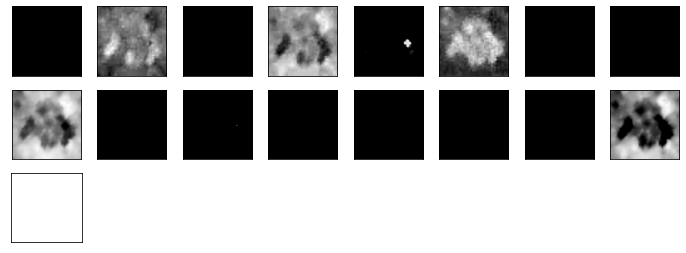

In [ ]:


#conv_layer_index = [1, 3, 5, 7, 8, 9, 10, 11]  #TO define a shorter model
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

#Input shape to the model is 224 x 224. SO resize input image to this shape.
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/split_rgb/test/MC/cntr_high 72.jpg', target_size=(224, 224)) #VGG user 224 as input

# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)

# Generate feature output by predicting on the input image
feature_output = model_short.predict(img)


columns = 8
rows = 8
for ftr in feature_output:
    #pos = 1
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        #pos += 1
    plt.show()

In [ ]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)

1 max_pooling2d_4 (None, 111, 111, 16)
3 max_pooling2d_5 (None, 54, 54, 32)
5 max_pooling2d_6 (None, 26, 26, 32)
7 max_pooling2d_7 (None, 12, 12, 64)
8 flatten_1 (None, 9216)
9 dense_2 (None, 1024)
10 dropout_1 (None, 1024)
11 dense_3 (None, 2)
